# Cloud Price Analysis

Given a dataset that talks about the cloud needs of RedHat and cloud services by aws, build a Cost-Optimization model that allows the user to make a wise decision on how cloud services should be managed with time. The model should be configurable, automated and should display detailed information behind each prediction.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

### Data Downloading

* In order to access the public dataset of aws-cloud-pricing, we can download the data manually from [here](https://pricing.us-east-1.amazonaws.com/offers/v1.0/aws/index.json) and save it in the data/raw folder. 

In [2]:
df = pd.read_json("../../data/raw/index.json")

### Data Understanding and Preprocessing
* After downloading the data, let's have a look at our datset and see how it is structured. 
* We'll start by looking at first few values in order to understand the structure.
* Further, we'll study each feature in detail.

In [3]:
features = {
    "formatVersion",
    "disclaimer",
    "offerCode",
    "version",
    "publicationDate",
    "products",
    "terms",
}
df.head()

,formatVersion,disclaimer,offerCode,version,publicationDate,products,terms
SZ472S2RBJNMG88E,v1.0,This pricing list is for informational purpose...,AmazonEC2,20200618221809,2020-06-18T22:18:09Z,"{'sku': 'SZ472S2RBJNMG88E', 'productFamily': '...",NaN
XA55FCPSHD2ABUC5,v1.0,This pricing list is for informational purpose...,AmazonEC2,20200618221809,2020-06-18T22:18:09Z,"{'sku': 'XA55FCPSHD2ABUC5', 'productFamily': '...",NaN
JF25X344J7WKTCG7,v1.0,This pricing list is for informational purpose...,AmazonEC2,20200618221809,2020-06-18T22:18:09Z,"{'sku': 'JF25X344J7WKTCG7', 'productFamily': '...",NaN
JA7STMZBVD3T59GQ,v1.0,This pricing list is for informational purpose...,AmazonEC2,20200618221809,2020-06-18T22:18:09Z,"{'sku': 'JA7STMZBVD3T59GQ', 'productFamily': '...",NaN
SJQU8C5FNVFYMK7X,v1.0,This pricing list is for informational purpose...,AmazonEC2,20200618221809,2020-06-18T22:18:09Z,"{'sku': 'SJQU8C5FNVFYMK7X', 'productFamily': '...",NaN


In [4]:
print("Shape of the data\n\n", df.shape)
print("\n\n")
print("Is null?\n\n", df.isnull().sum())
print("\n\n")
print("Columnwise Datatype\n\n", df.dtypes)

Shape of the data

 (244351, 7)



Is null?

 formatVersion           0
disclaimer              0
offerCode               0
version                 0
publicationDate         0
products                2
terms              244349
dtype: int64



Columnwise Datatype

 formatVersion      object
disclaimer         object
offerCode          object
version             int64
publicationDate    object
products           object
terms              object
dtype: object


Looking at the dataframe, we can infer that the `products` column contains a lot of information. Let's dive deeper to see what information it holds :

In [5]:
df_products = df["products"]
df_products = df_products.fillna("NA")

Each product has three parameters :
- SKU  : id 
- productFamily
- attributes

Let's get into ProductFamily and attributes to see what values they have.

In [6]:
dfp = df_products.sample(
    2400
)  # make a subset of 2400 entries for easier and smaller calculations

In [7]:
dfp_normalize = pd.json_normalize(dfp)
(dfp_normalize).fillna("NA")

,sku,productFamily,attributes.servicecode,attributes.location,attributes.locationType,attributes.instanceType,attributes.currentGeneration,attributes.instanceFamily,attributes.vcpu,attributes.physicalProcessor,...,attributes.fromLocation,attributes.fromLocationType,attributes.toLocation,attributes.toLocationType,attributes.instanceCapacity12xlarge,attributes.instanceCapacity16xlarge,attributes.instanceCapacity24xlarge,attributes.instanceCapacity8xlarge,attributes.instanceCapacityMetal,attributes.instanceCapacity32xlarge
0,FJU52S3ATSH3Y945,Compute Instance,AmazonEC2,Asia Pacific (Seoul),AWS Region,x1e.16xlarge,Yes,Memory optimized,64,High Frequency Intel Xeon E7-8880 v3 (Haswell),...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,MBBTDY5VEVG5H845,Compute Instance,AmazonEC2,EU (Frankfurt),AWS Region,r5ad.8xlarge,Yes,Memory optimized,32,AMD EPYC 7571,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,NT9QA9FJBS94KCPH,Compute Instance,AmazonEC2,Canada (Central),AWS Region,m4.large,Yes,General purpose,2,Intel Xeon E5-2676 v3 (Haswell),...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,S5H8KFK35KAENKEY,Compute Instance,AmazonEC2,South America (Sao Paulo),AWS Region,r5.2xlarge,Yes,Memory optimized,8,Intel Xeon Platinum 8175 (Skylake),...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,C28SA47ENKTE9M8H,Compute Instance,AmazonEC2,Asia Pacific (Hong Kong),AWS Region,c5d.18xlarge,Yes,Compute optimized,72,Intel Xeon Platinum 8124M,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,38VVR2NU9XNW87J2,Compute Instance,AmazonEC2,Asia Pacific (Sydney),AWS Region,m5d.xlarge,Yes,General purpose,4,Intel Xeon Platinum 8175 (Skylake),...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2396,3F3RZVH8KPMQSXTR,Compute Instance,AmazonEC2,AWS GovCloud (US-East),AWS Region,c5d.xlarge,Yes,Compute optimized,4,Intel Xeon Platinum 8124M,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2397,64ZQWH349DXXHAF4,Compute Instance,AmazonEC2,US West (Oregon),AWS Region,r5d.4xlarge,Yes,Memory optimized,16,Intel Xeon Platinum 8175 (Skylake),...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2398,37EDKZP2P4GWPTMA,Compute Instance,AmazonEC2,EU (Frankfurt),AWS Region,r5n.large,Yes,Memory optimized,2,Intel Xeon Platinum 8259 (Cascade Lake),...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


#### What productFamily does the product have?

In [8]:
pd.Series((dfp_normalize["productFamily"])).unique()

array(['Compute Instance', 'Compute Instance (bare metal)',
       'Dedicated Host', 'NAT Gateway', 'Storage Snapshot',
       'Data Transfer', 'IP Address', 'Load Balancer-Network'],
      dtype=object)

#### What all attributes does the product have?

In [9]:
list_k = []
for k, v in dfp.items():
    attributes = v["attributes"]
    for k, v in attributes.items():
        list_k.append(k)
unique_keys = set(list_k)
for i in unique_keys:
    print(i)

locationType
enhancedNetworkingSupported
intelAvx2Available
fromLocationType
toLocationType
storage
gpu
group
instanceCapacity12xlarge
tenancy
instanceCapacity16xlarge
instancesku
ecu
instanceFamily
instanceCapacityMetal
capacitystatus
dedicatedEbsThroughput
preInstalledSw
instanceCapacity18xlarge
servicecode
memory
normalizationSizeFactor
instanceCapacity8xlarge
operatingSystem
vcpu
instanceCapacity24xlarge
location
physicalCores
transferType
usagetype
operation
instanceCapacityXlarge
processorArchitecture
servicename
networkPerformance
licenseModel
instanceCapacity2xlarge
instanceCapacity4xlarge
storageMedia
intelAvxAvailable
instanceType
instanceCapacity9xlarge
toLocation
processorFeatures
currentGeneration
groupDescription
instanceCapacityLarge
intelTurboAvailable
physicalProcessor
instanceCapacity32xlarge
clockSpeed
fromLocation


#### Attributes hold a dictionary that contains following parameters:
* instanceFamily 	
*  memory 	
* networkPerformance 	
* ecu 	
* locationType 	
* enhancedNetworkingSupported 	
* intelAvx2Available 	
* intelTurboAvailable 	
* location 	
* normalizationSizeFactor 	
* physicalCores 	
* tenancy 	
* instancesku 	
* licenseModel 	
* physicalProcessor 	
* preInstalledSw 	
* usagetype 	
* processorFeatures 	
* operatingSystem 	
* instanceType 	
* capacitystatus 	
* processorArchitecture 	
* dedicatedEbsThroughput 	
* servicename 	
* servicecode 	
* vcpu 	
* intelAvxAvailable 	
* instanceCapacityMetal 	
* storage 	
* clockSpeed 	
* currentGeneration 	
* gpu 	
* operation

#### Attributes
This function find the unique list of a particular attribute. This allows us to explore the dataset we are dealing with, and we can hence find out correlations later in this project.

In [10]:
def make_attributes_dictionary(dfp):
    new_dict = {}
    for i in range(len(dfp)):
        new_dict.update(dfp[i]["attributes"])
    return new_dict

In [11]:
def attributes(attribute):
    list_v = []
    for key, value in dfp.items():
        attributes = value["attributes"]
        for k, v in attributes.items():
            if k == attribute:
                list_v.append(v)
    print(attribute, ":")
    print(set(list_v))

#### Finding various (unique)locations and location type these services are being used :

In [12]:
pd.Series(dfp_normalize["attributes.location"]).unique()

array(['Asia Pacific (Seoul)', 'EU (Frankfurt)', 'Canada (Central)',
       'South America (Sao Paulo)', 'Asia Pacific (Hong Kong)',
       'Asia Pacific (Tokyo)', 'US West (Oregon)', 'EU (Ireland)',
       'EU (Milan)', 'Africa (Cape Town)', 'Asia Pacific (Mumbai)',
       'Asia Pacific (Osaka-Local)', 'Asia Pacific (Singapore)',
       'US West (N. California)', 'Asia Pacific (Sydney)',
       'AWS GovCloud (US-East)', 'US East (Ohio)',
       'AWS GovCloud (US-West)', 'US East (N. Virginia)', 'EU (London)',
       'EU (Stockholm)', 'Middle East (Bahrain)', 'EU (Paris)',
       'US West (Los Angeles)', nan], dtype=object)

In [13]:
pd.Series(dfp_normalize["attributes.locationType"]).unique()

array(['AWS Region', nan], dtype=object)

#### Finding current generation for these services that are being used :

In [14]:
pd.Series(dfp_normalize["attributes.currentGeneration"]).unique()

array(['Yes', 'No', nan], dtype=object)

In [15]:
pd.Series(dfp_normalize["attributes.instanceFamily"]).unique()

array(['Memory optimized', 'General purpose', 'Compute optimized',
       'GPU instance', 'Storage optimized', nan,
       'Machine Learning ASIC Instances'], dtype=object)

#### Finding the vcpu options available

In [16]:
pd.Series(dfp_normalize["attributes.vcpu"]).unique()

array(['64', '32', '2', '8', '72', '96', '4', '16', '48', '12', '128',
       '1', '36', '24', '448', nan, '40'], dtype=object)

#### Finding the physical processors offered:

In [17]:
pd.Series(dfp_normalize["attributes.physicalProcessor"]).unique()

array(['High Frequency Intel Xeon E7-8880 v3 (Haswell)', 'AMD EPYC 7571',
       'Intel Xeon E5-2676 v3 (Haswell)',
       'Intel Xeon Platinum 8175 (Skylake)', 'Intel Xeon Platinum 8124M',
       'Intel Xeon Platinum 8259 (Cascade Lake)', 'Intel Xeon Family',
       'Intel Skylake E5 2686 v5', 'Intel Xeon E5-2686 v4 (Broadwell)',
       'Intel Xeon Platinum 8275L', 'AMD EPYC 7R32',
       'AWS Graviton2 Processor', 'Intel Xeon E5-2680 v2 (Ivy Bridge)',
       'Intel Xeon E5-2670 v2 (Ivy Bridge/Sandy Bridge)',
       'AWS Graviton Processor', 'Intel Xeon E5-2670 v2 (Ivy Bridge)',
       'Intel Xeon E5-2666 v3 (Haswell)', 'Intel Xeon Platinum 8151',
       'Intel Xeon Scalable (Skylake)', nan,
       'Intel Xeon E5-2670 (Sandy Bridge)', 'Intel Xeon E5-2650',
       'Intel Xeon Platinum 8275CL (Cascade Lake)'], dtype=object)

In [18]:
pd.Series(dfp_normalize["attributes.clockSpeed"]).unique()

array(['2.3 GHz', '2.5 GHz', '2.4 GHz', '3.1 GHz', '3 GHz', '2.8 GHz',
       nan, '2.9 GHz', '4 GHz', 'Up to 3.3 GHz', '2.6 GHz', '2.0 GHz'],
      dtype=object)

In [19]:
pd.Series(dfp_normalize["attributes.memory"]).unique()

array(['1952 GiB', '256 GiB', '8 GiB', '64 GiB', '144 GiB', '384 GiB',
       '512 GiB', '768 GiB', '16 GiB', '244 GiB', 'NA', '192 GiB',
       '61 GiB', '32 GiB', '96 GiB', '42 GiB', '128 GiB', '976 GiB',
       '30 GiB', '30.5 GiB', '3904 GiB', '3.75 GiB', '15 GiB', '1 GiB',
       '15.25 GiB', '122 GiB', '60 GiB', '4 GiB', '2 GiB', '488 GiB',
       '0.5 GiB', '21 GiB', '72 GiB', '9216 GiB', nan, '7.5 GiB',
       '5.25 GiB', '17.1 GiB', '160 GiB', '10.5 GiB', '12288 GiB',
       '1.7 GiB', '732 GiB', '68.4 GiB', '117 GiB', '48 GiB'],
      dtype=object)

In [20]:
pd.Series(dfp_normalize["attributes.operation"]).unique()

array(['RunInstances:0006', 'RunInstances:0002', 'RunInstances:0004',
       'RunInstances:0200', 'RunInstances:0100', 'RunInstances:000g',
       'RunInstances:0010', 'RunInstances:0202', 'RunInstances',
       'RunInstances:0102', 'Hourly', 'RunInstances:0800', 'NatGateway',
       '', 'RunInstances:FFP-CM42-1', 'RunInstances:FFP-C42-1',
       'RunInstances:FFP-CMR33T22-1', 'RunInstances:FFP-M42T22-1',
       'RunInstances:FFP-CMR42T22-1', 'RunInstances:FFP-CM33T22-1',
       'LoadBalancing:Network'], dtype=object)

In [21]:
pd.Series(dfp_normalize["attributes.ecu"]).unique()

array(['179', 'NA', '6.5', '37', '281', '347', '16', 'Variable', '128',
       '23', '73', '26', '188', '256', '337', '168', '345', '20', '70',
       '208', '91', '55', '340', '3', '10', '13', '8', '174.5', '58',
       '28', '132', '64', '62', '97', '201', '31', '39', '139', nan, '19',
       '47', '349', '375', '27', '52', '12', '235', '53', '271', '104',
       '53.5', '14', '116', '56', '124.5', '4', '45', '7', '1', '5', '2',
       '108', '35'], dtype=object)

In [22]:
numerical_features = [
    "vcpu",
    "gpu",
    "ecu",
    "normalizationFactor",
    "instanceCapacity2xlarge",
    "normalizationSizeFactor",
    "instanceCapacity4xlarge",
    "instanceCapacityXlarge",
    "instanceCapacityLarge",
]

The function `common_attribute_count` allows the user to find out how many unique values for each attribute and its value exist. For example: if the user wants to see how many services are based in Tokyo, then they can specify the key as 'location' and the value as ''Asia Pacific (Tokyo)'.

In [23]:
def common_attribute_count(attribute_key, attribute_value):
    counter = 0
    for key, value in dfp.items():
        attributes = value["attributes"]
        new_dict = defaultdict(list)
        for k, v in attributes.items():
            if k == attribute_key:
                if v == attribute_value:
                    new_dict[k].append(v)
                    counter += 1
    #     print(dict(new_dict), counter)
    return counter

## Plots

For all the attributes, it'll be interesting to see some plots where we can see various values and their quantities in the data.

* For each attribute, we can see various unique values offered and in what proportions.

In [24]:
def attributes_plots(attribute):
    list_v = []
    for key, value in dfp.items():
        attributes = value["attributes"]
        for k, v in attributes.items():
            if k == attribute:
                list_v.append(v)
    unique_values = set(list_v)
    return unique_values

In [25]:
def bar_chart(attribute_key):
    a = attributes_plots(attribute_key)
    if attribute_key in numerical_features:
        a.discard("NA")
        a.discard("Variable")
        print((a))
        a = sorted(a, key=lambda x: float(x))
    else:
        a = sorted(a)

    plt.subplots(figsize=(20, 10))
    for i in a:
        if i == "":
            i = "NA"
        else:
            y = common_attribute_count(attribute_key, i)
            plt.bar(i, y)
            plt.xticks(rotation=90)
            plt.title(attribute_key)
    plt.show()

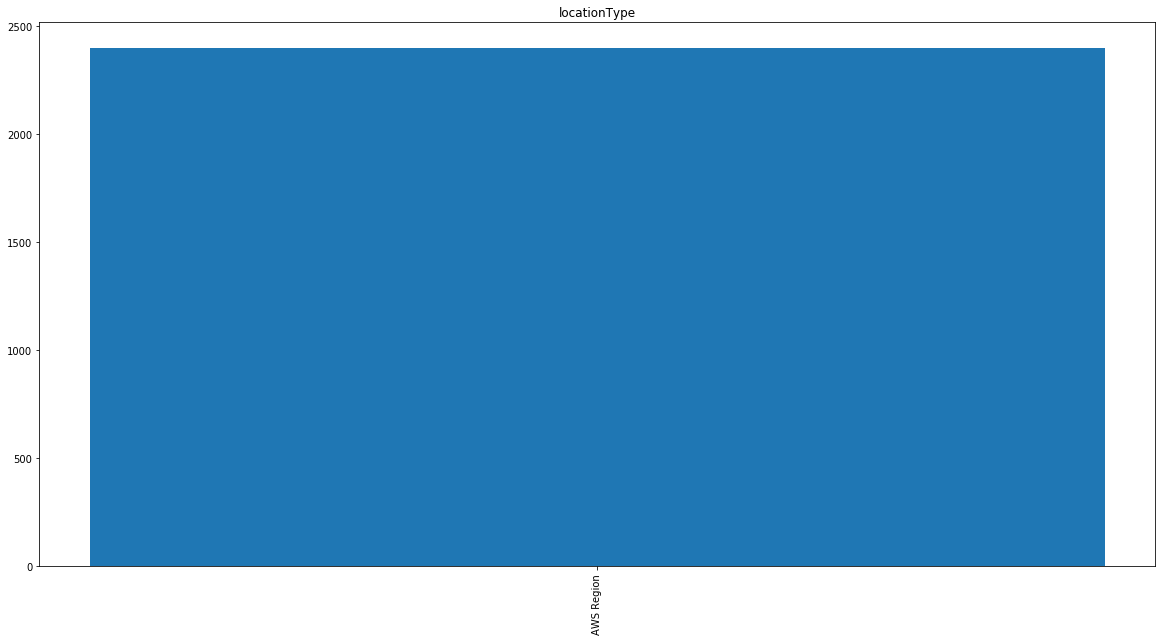

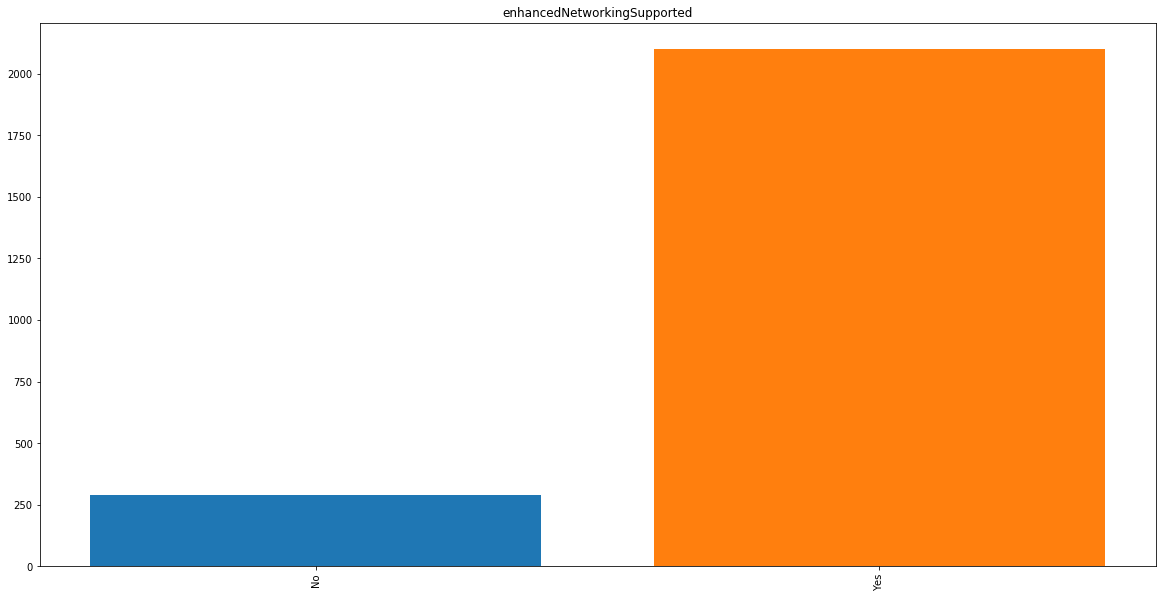

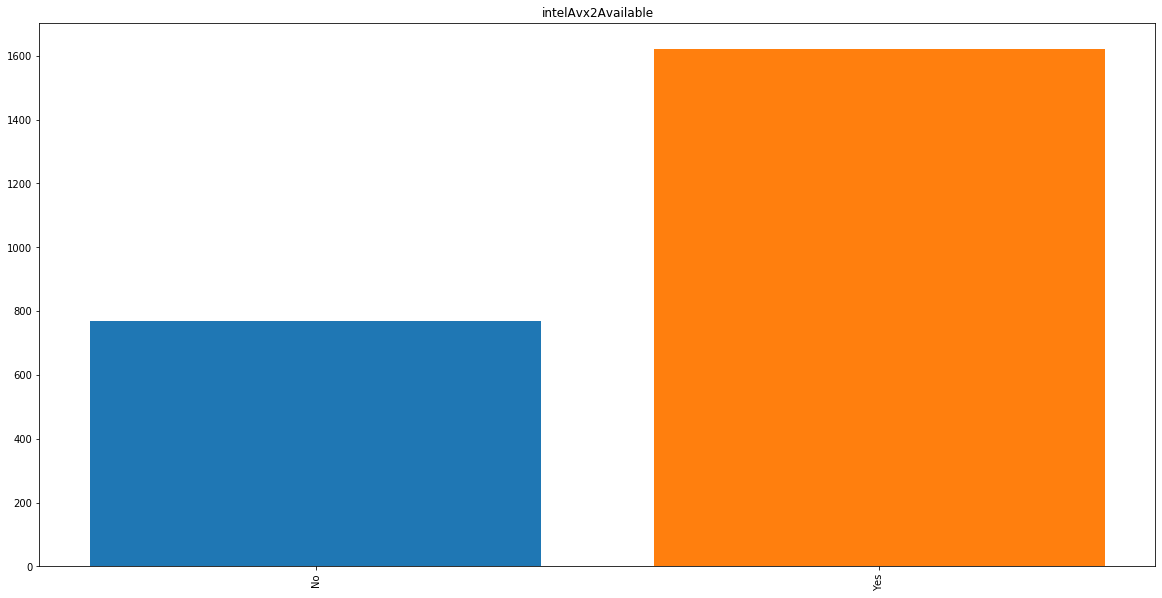

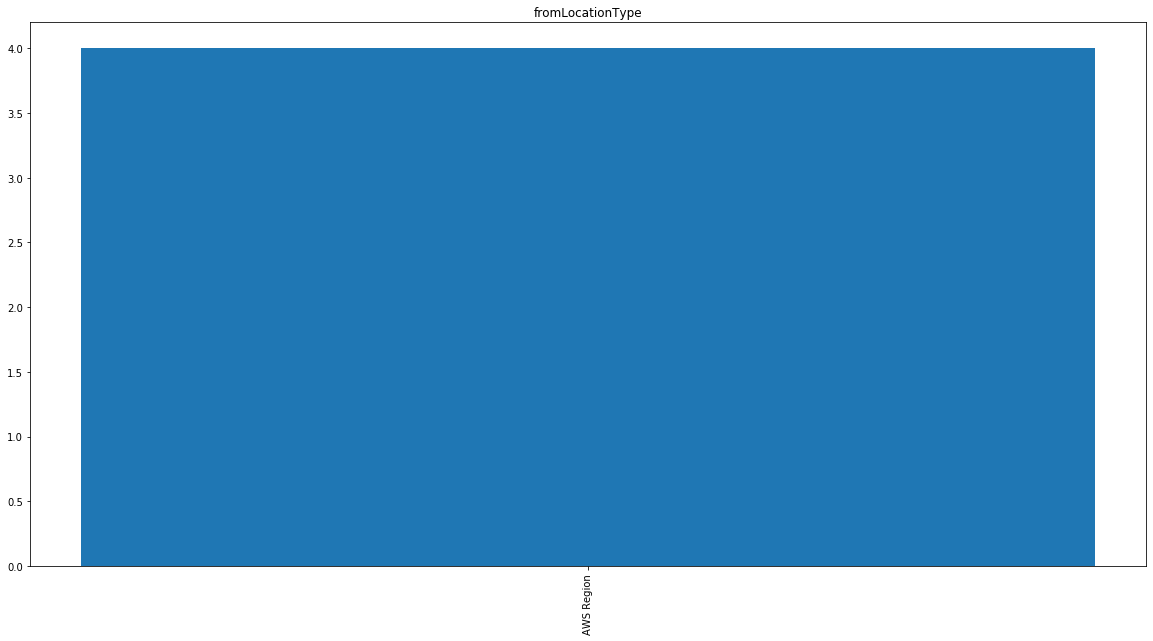

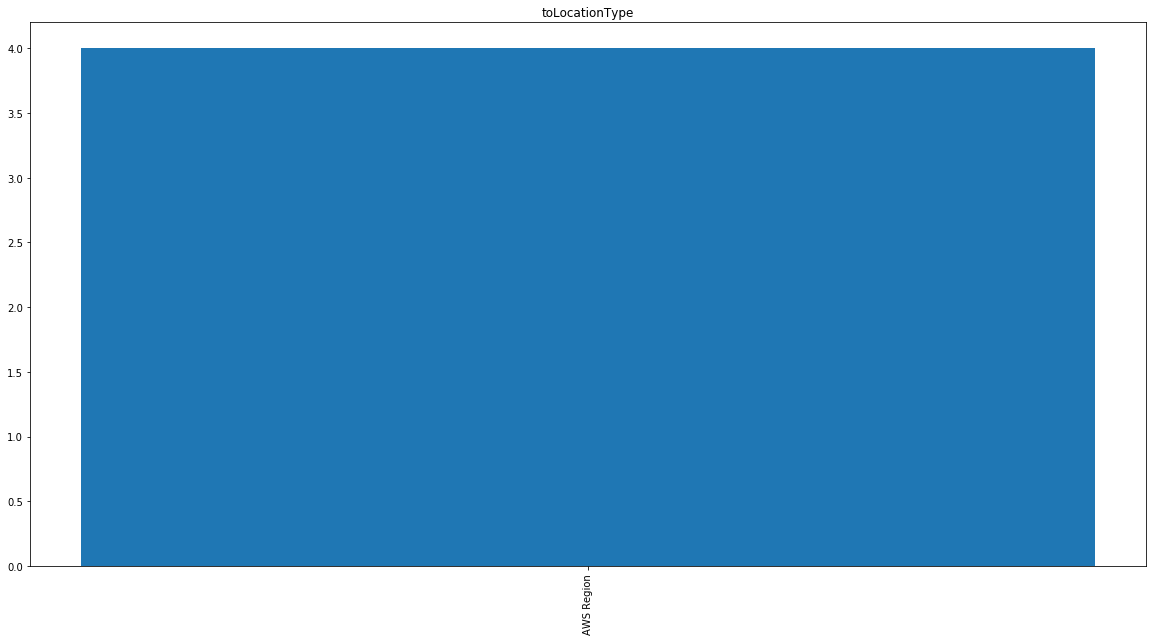

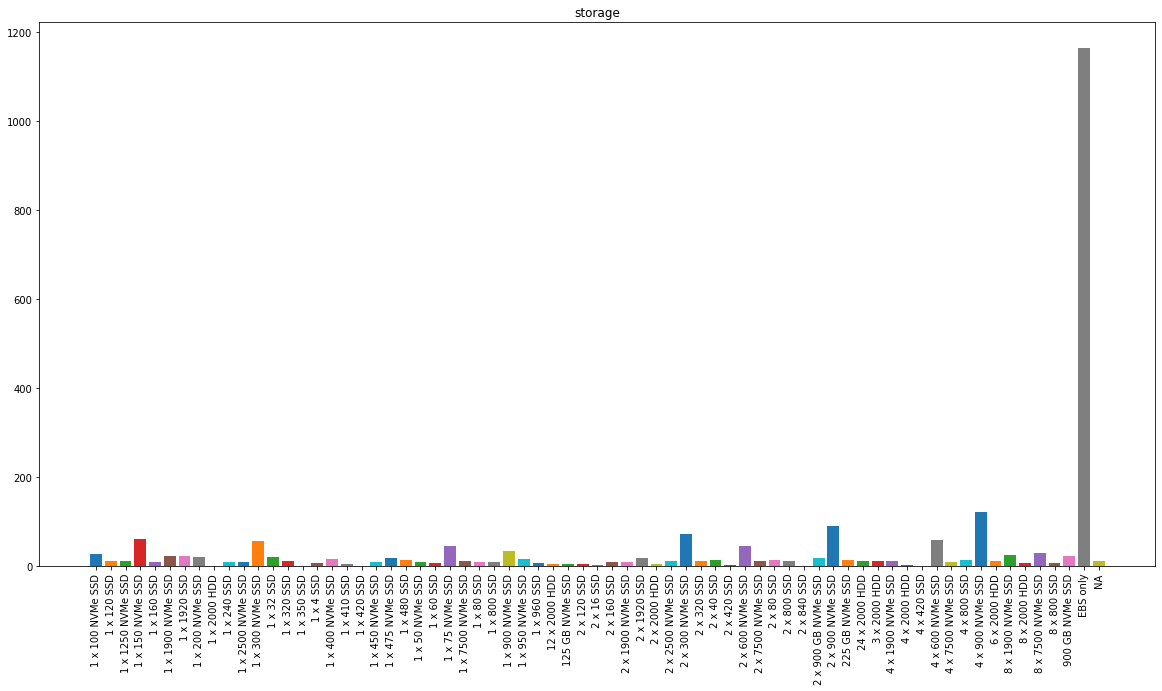

{'4', '16', '8', '1', '2'}


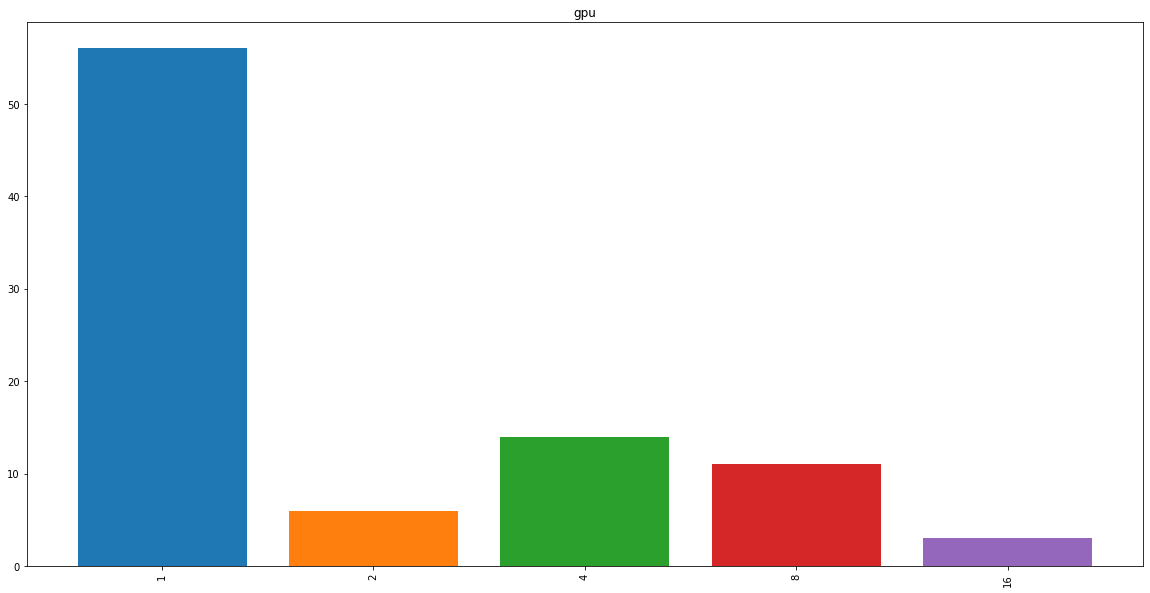

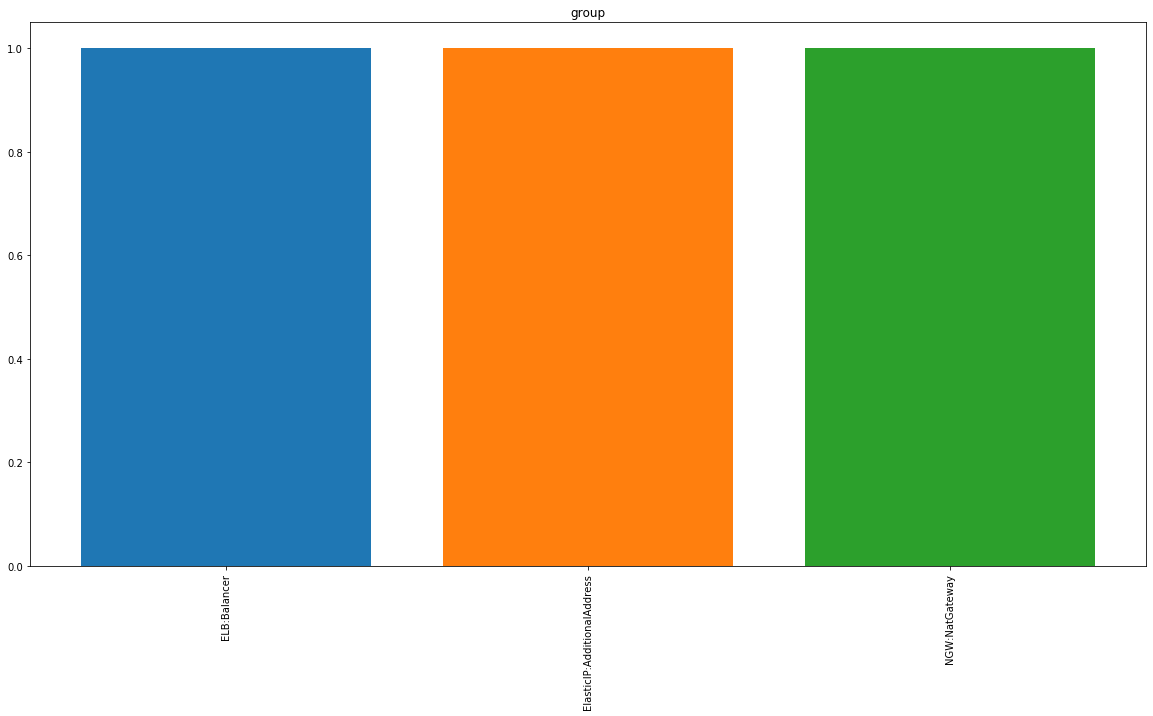

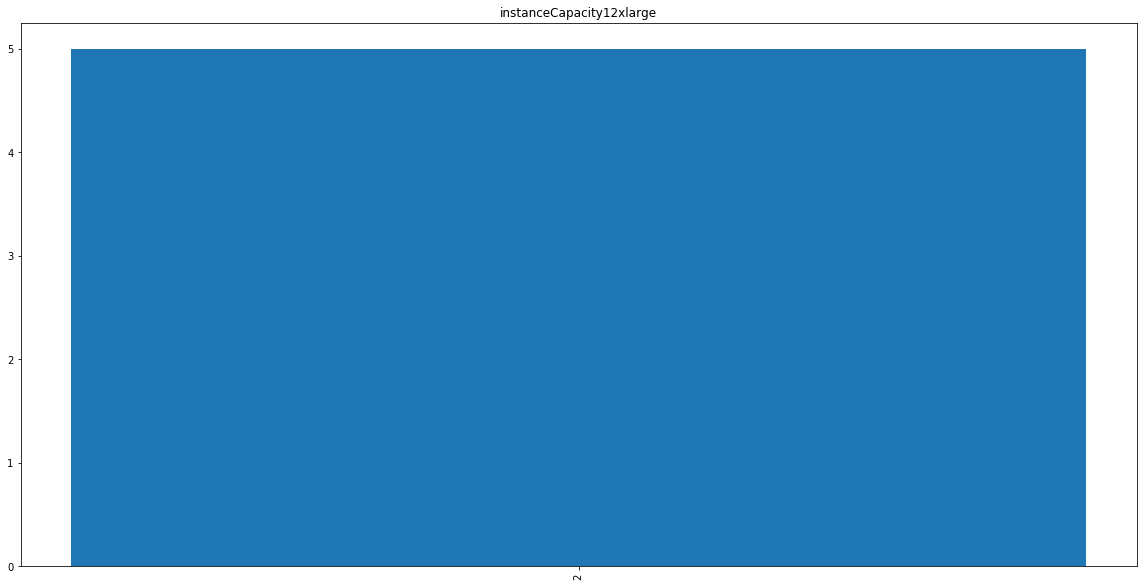

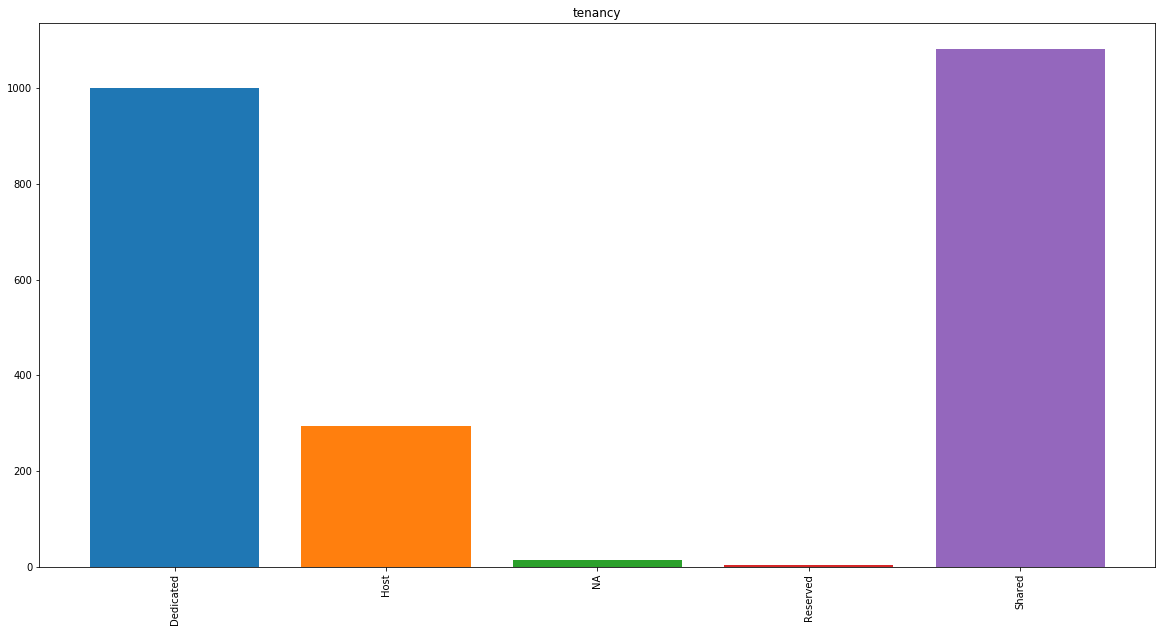

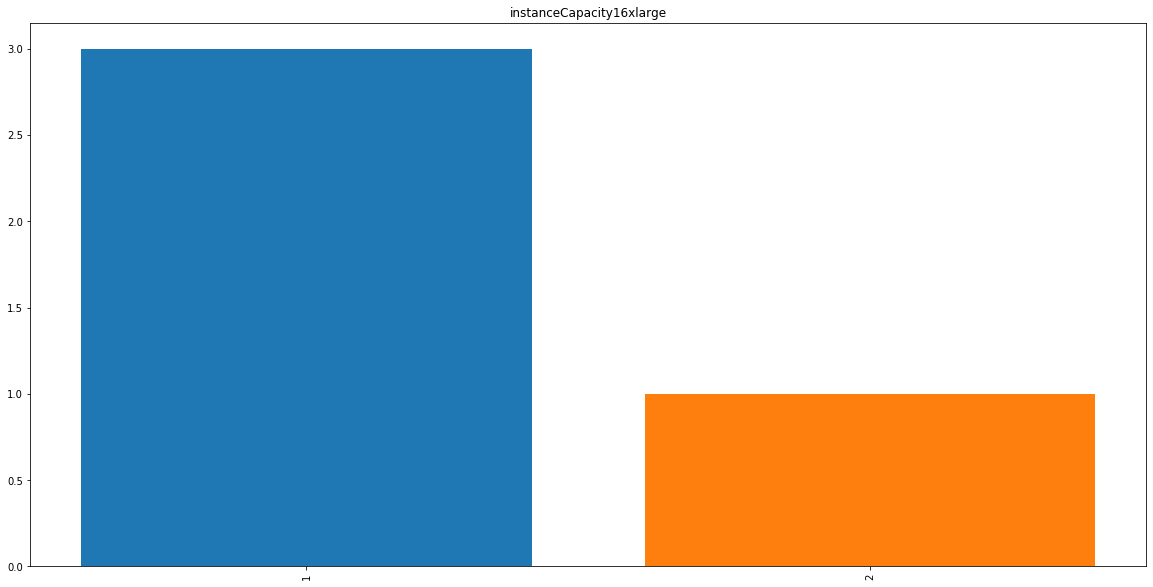

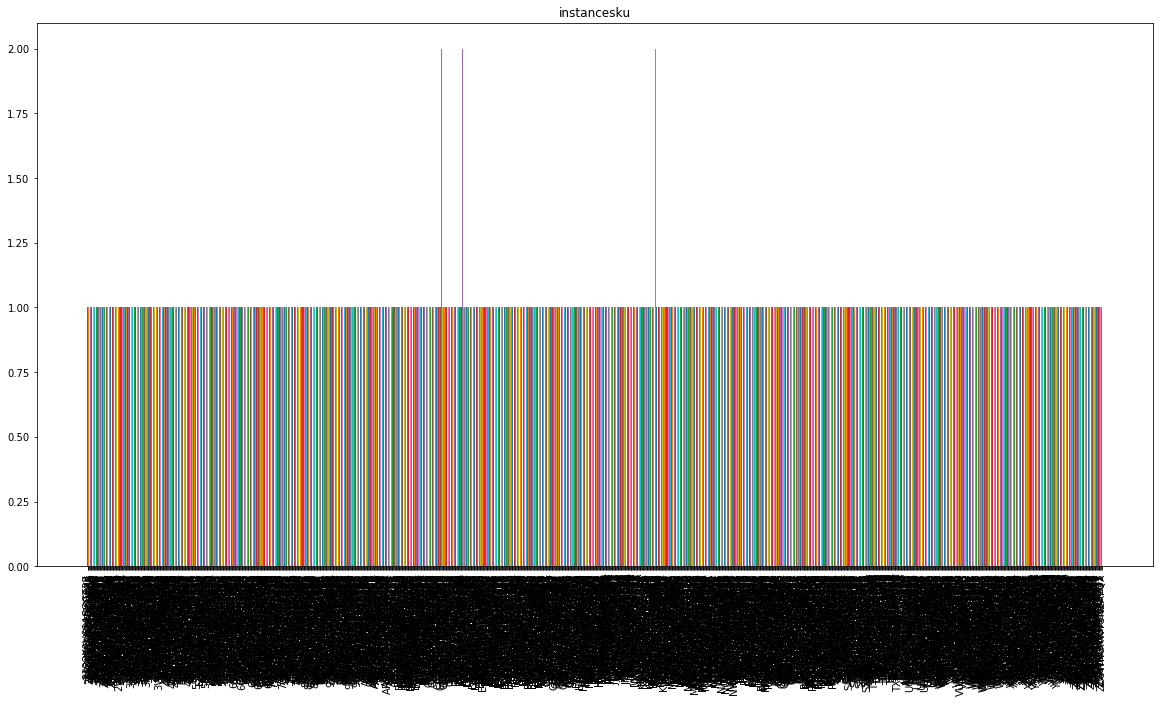

{'139', '53', '45', '168', '58', '124.5', '64', '345', '132', '104', '1', '26', '55', '2', '347', '23', '337', '3', '8', '28', '174.5', '19', '7', '27', '73', '5', '108', '256', '116', '281', '31', '52', '12', '128', '208', '39', '14', '91', '201', '4', '47', '35', '349', '375', '188', '56', '179', '62', '16', '271', '97', '235', '53.5', '13', '37', '6.5', '20', '340', '70', '10'}


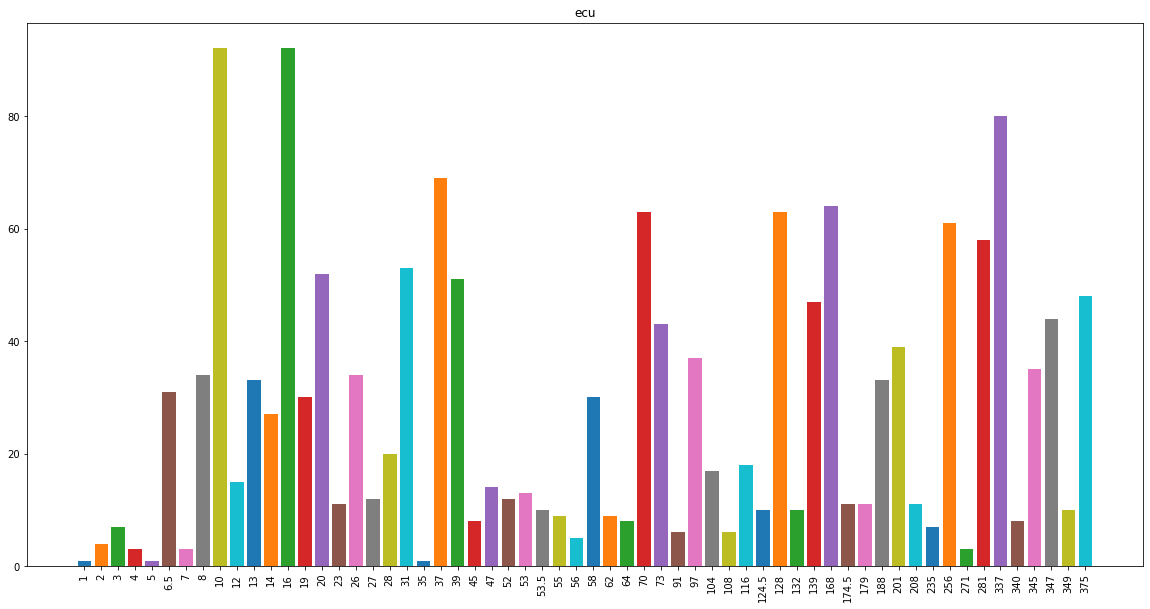

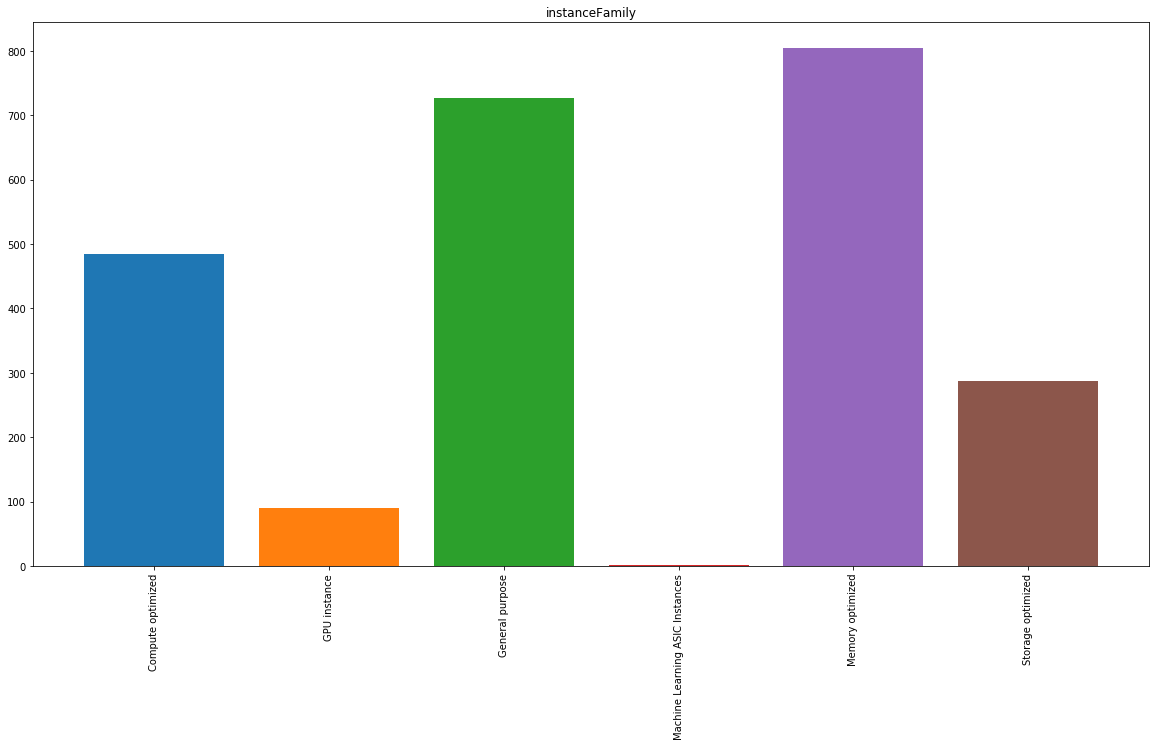

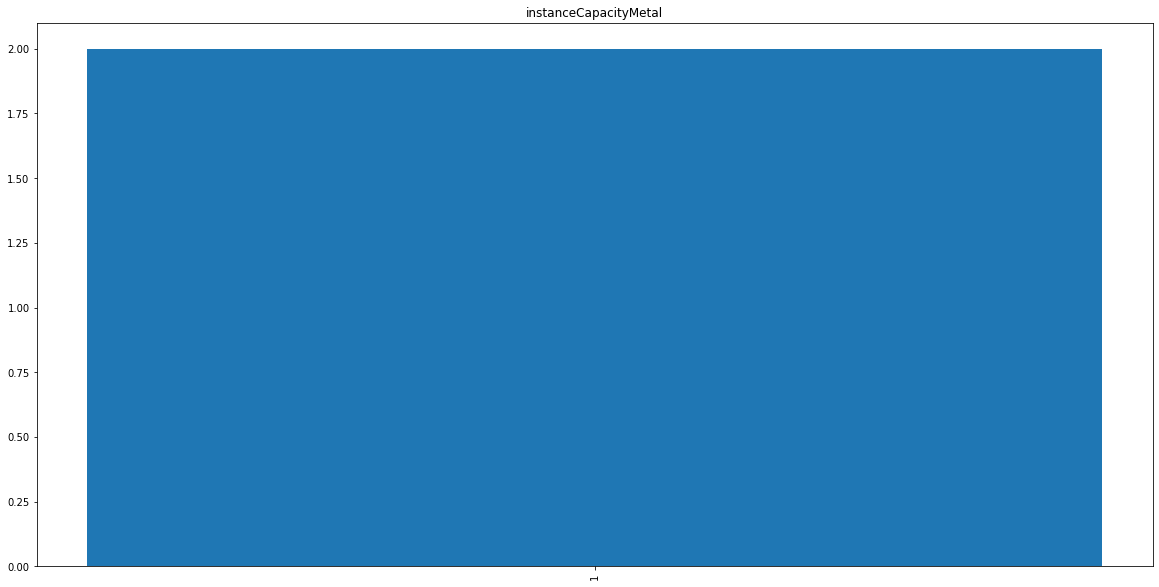

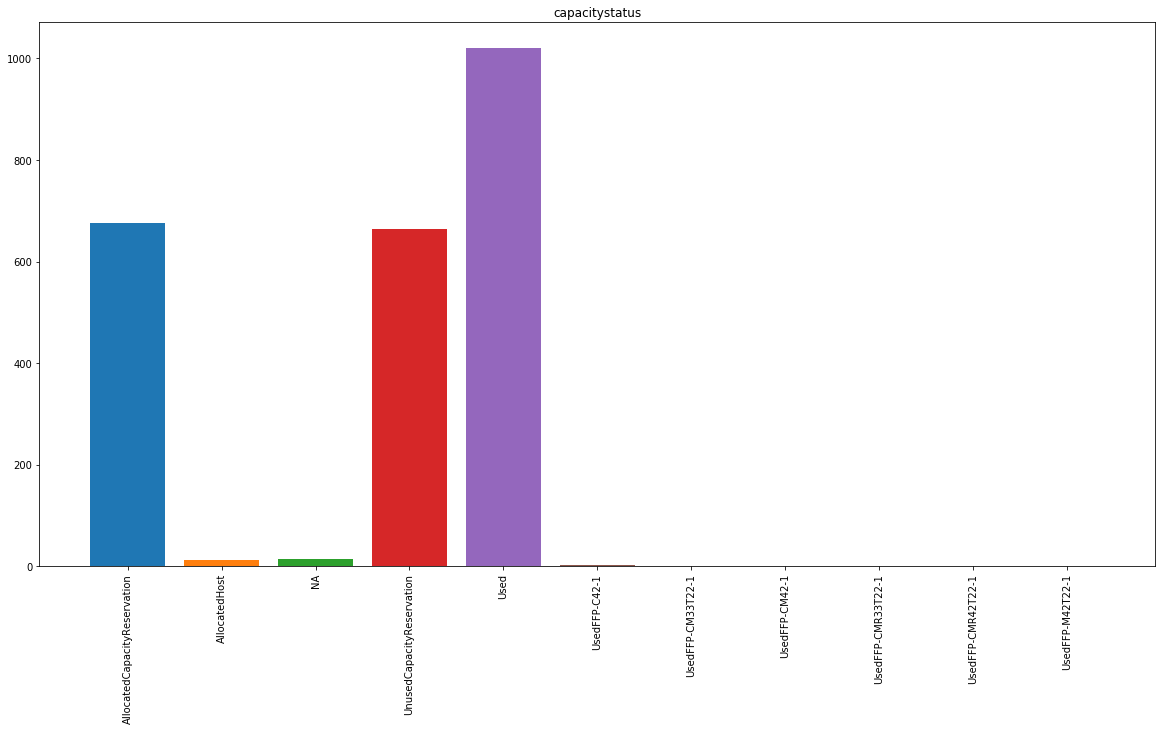

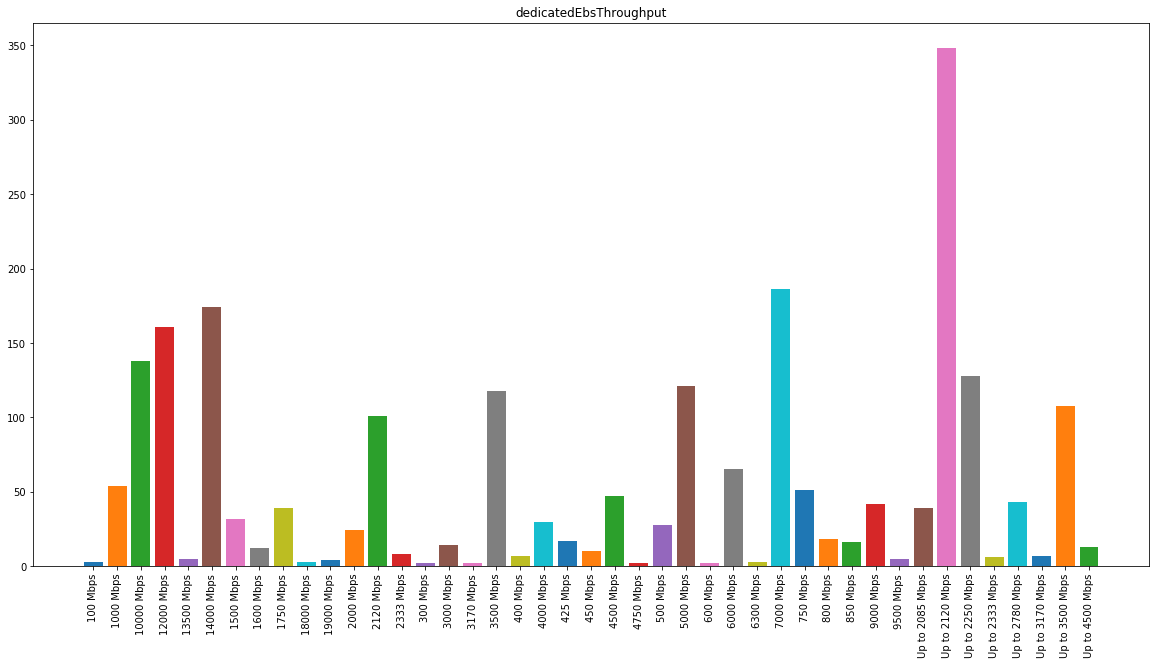

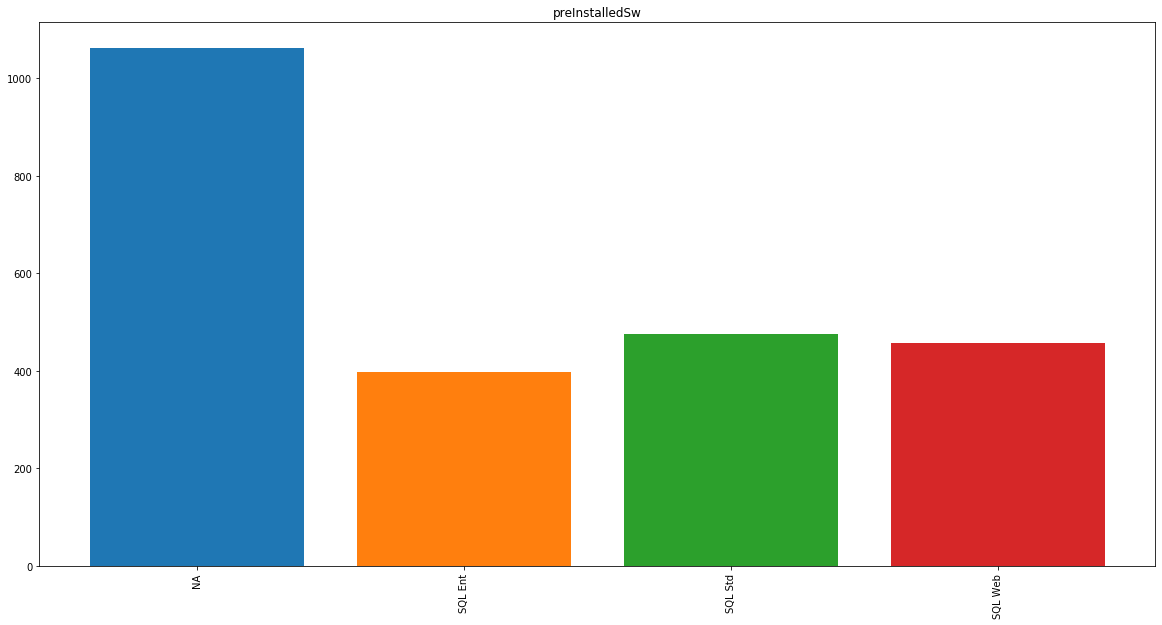

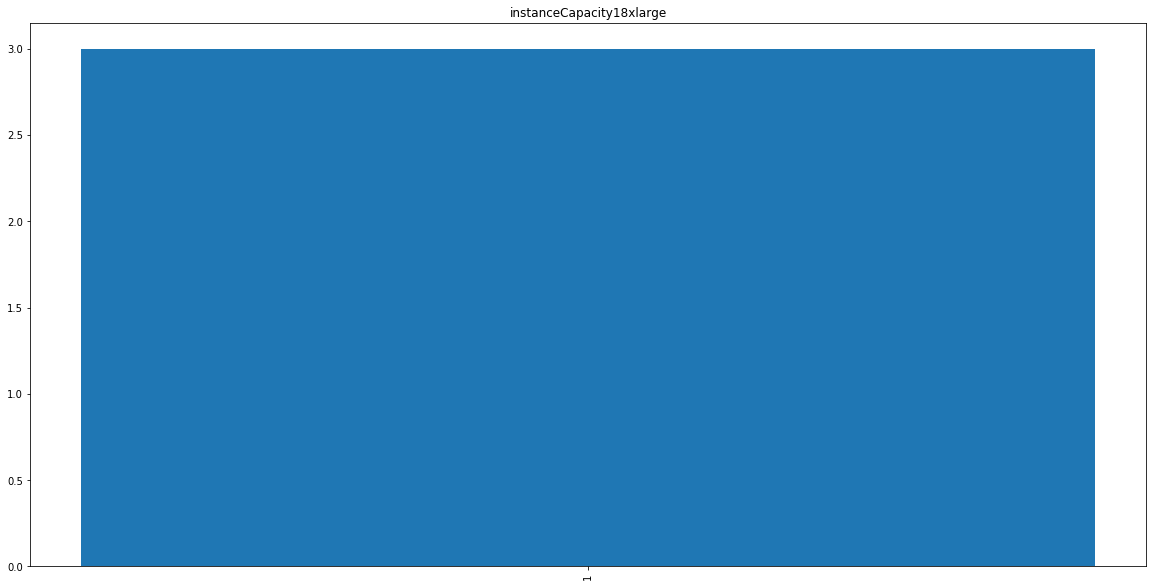

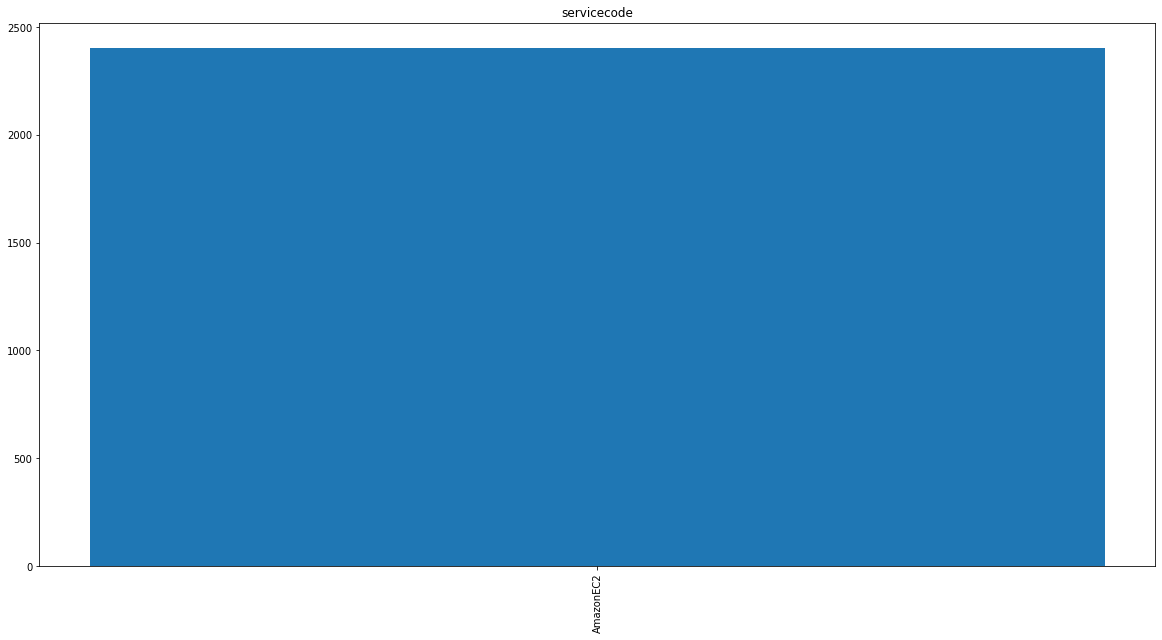

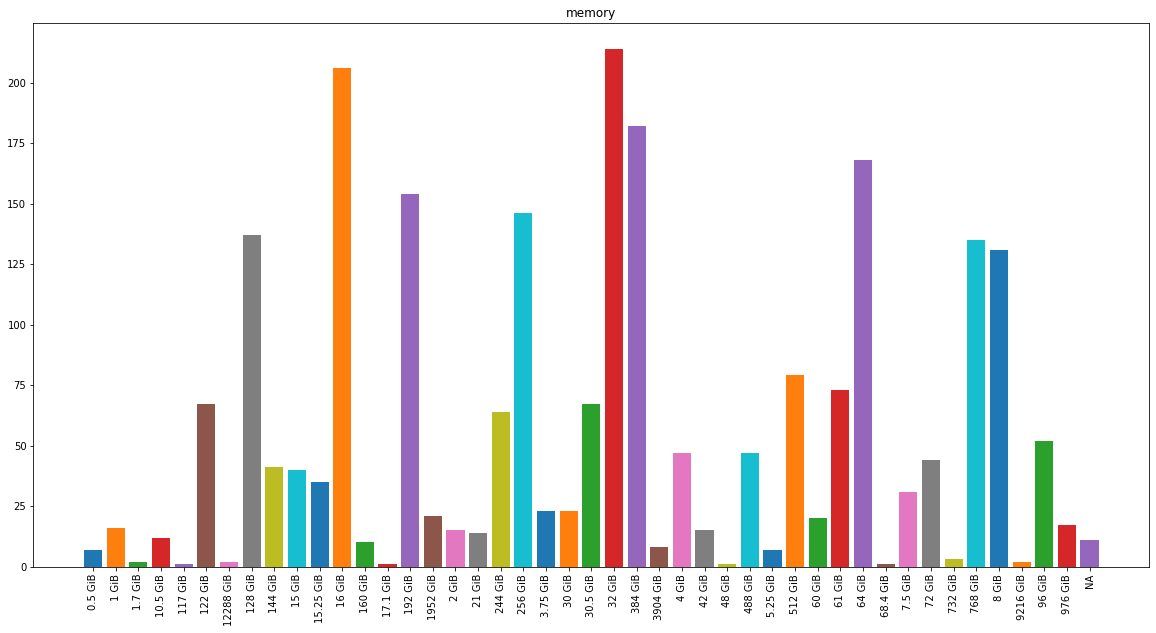

{'4', '128', '16', '144', '8', '96', '48', '0.25', '64', '24', '80', '2', '0.5', '1', '256', '192', '72', '32'}


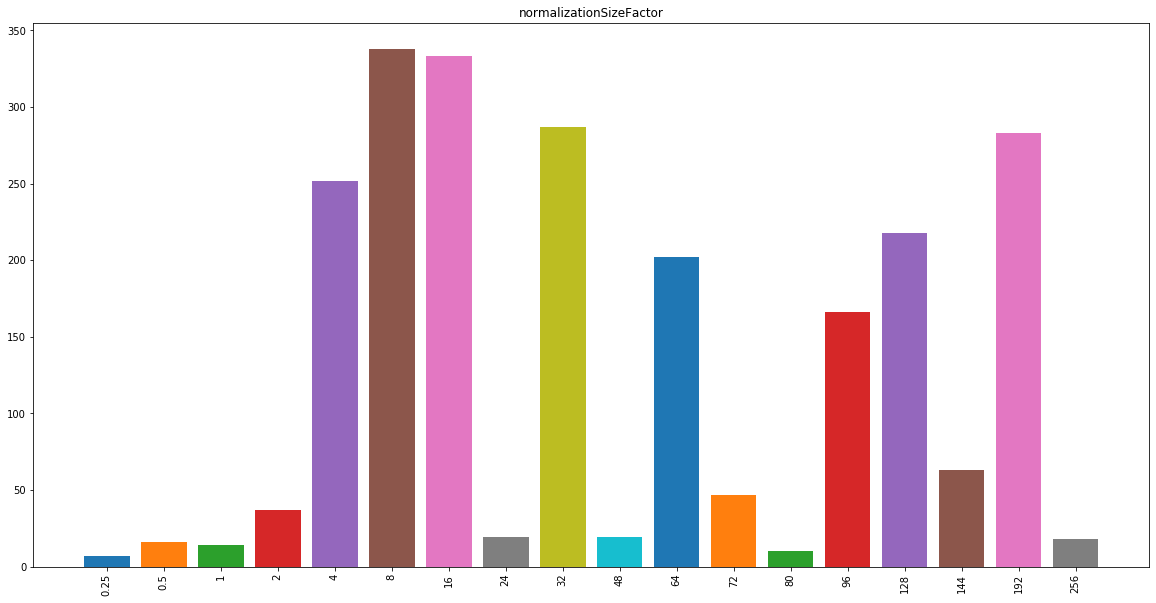

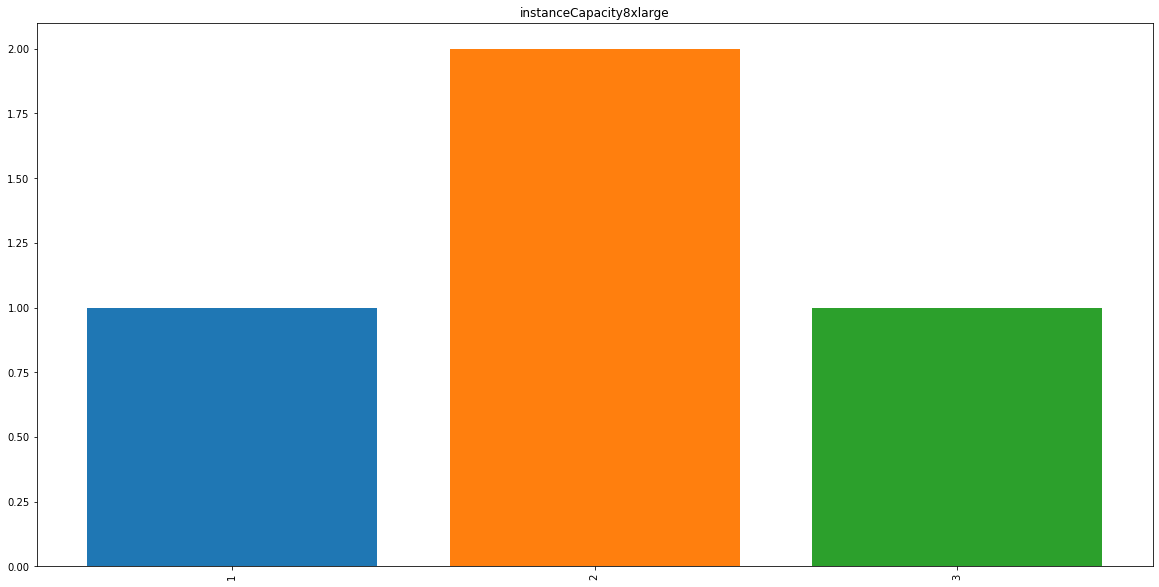

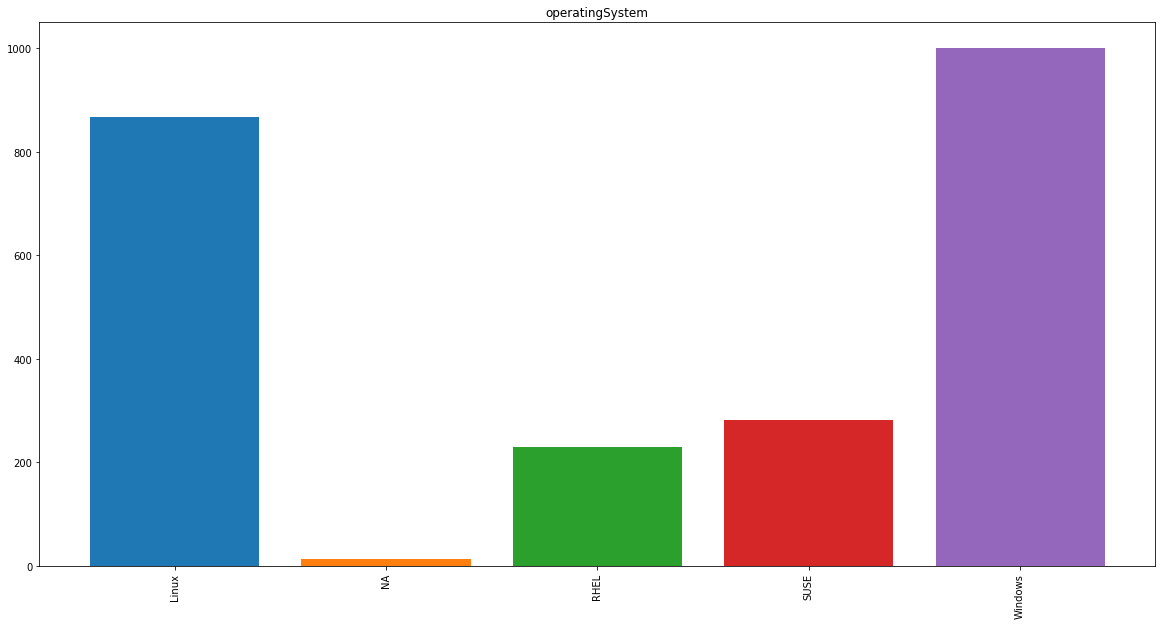

{'4', '16', '8', '128', '96', '48', '40', '64', '24', '36', '1', '448', '2', '12', '72', '32'}


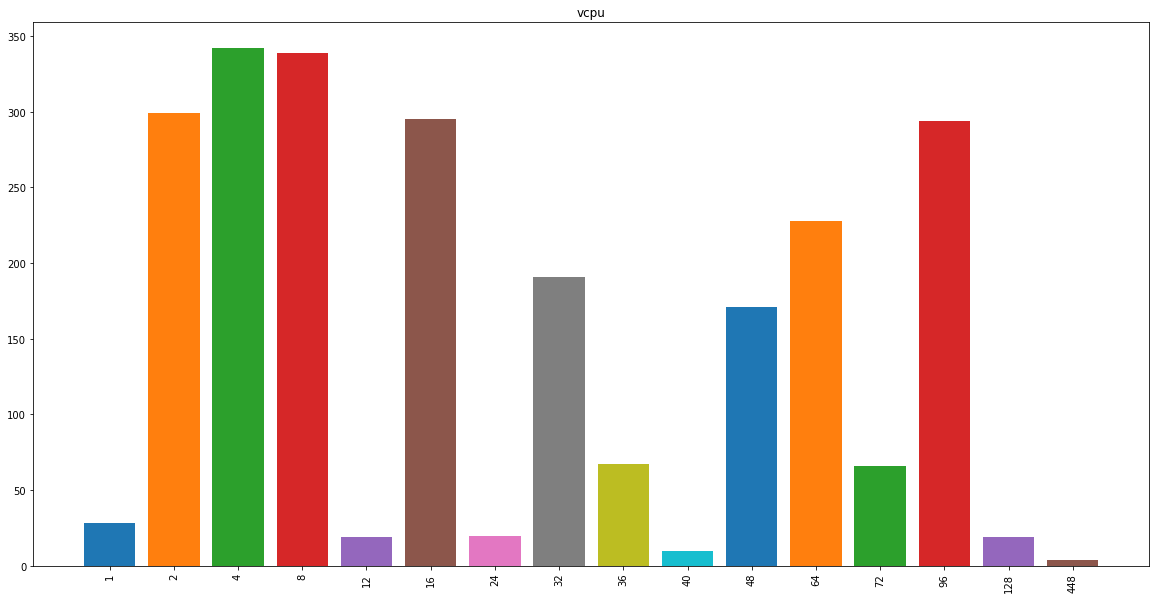

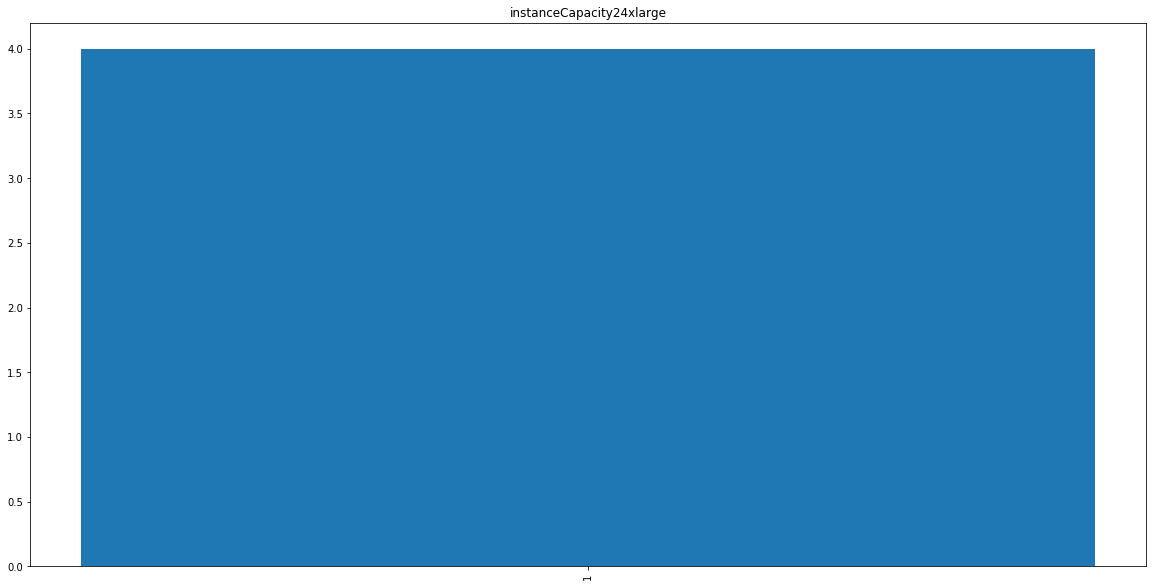

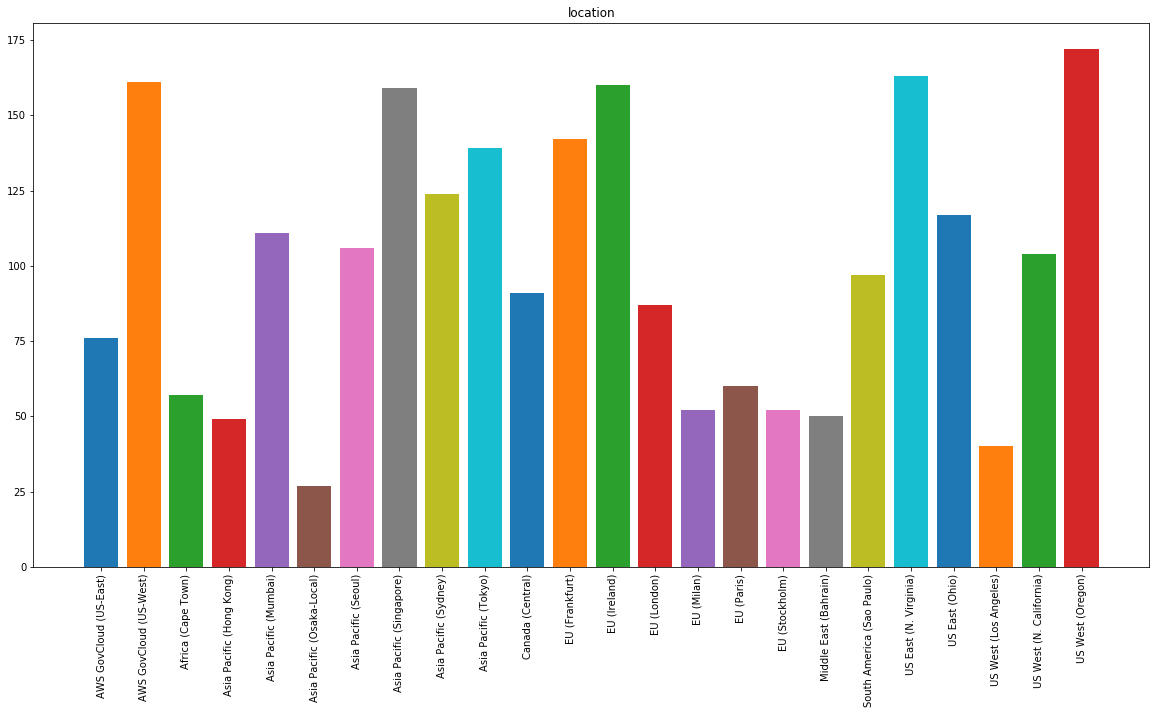

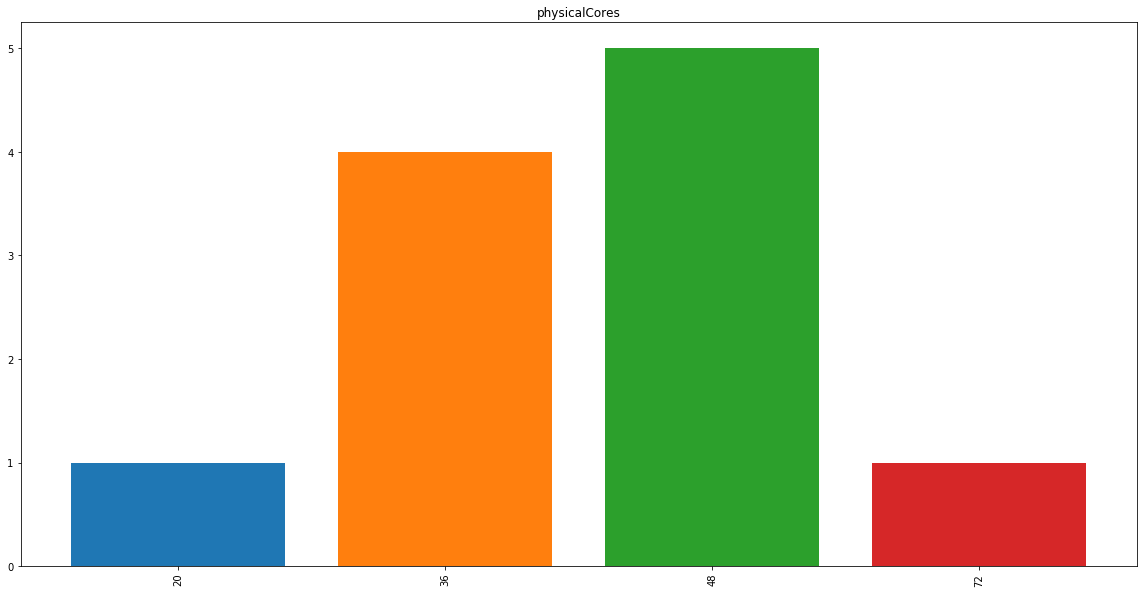

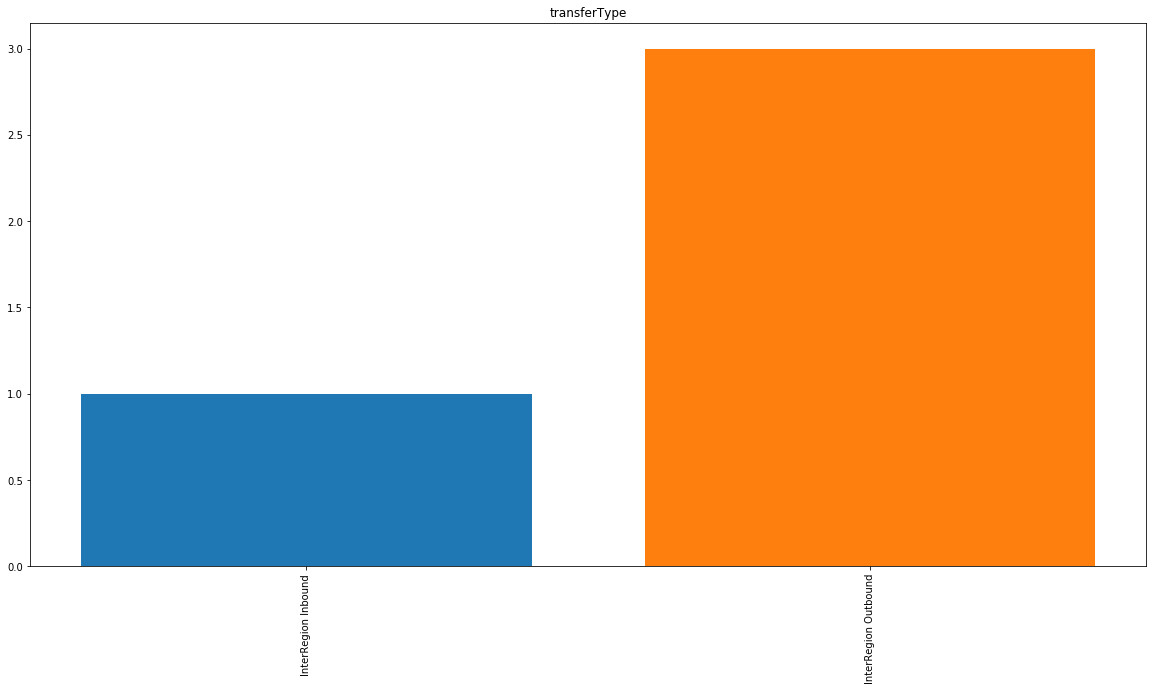

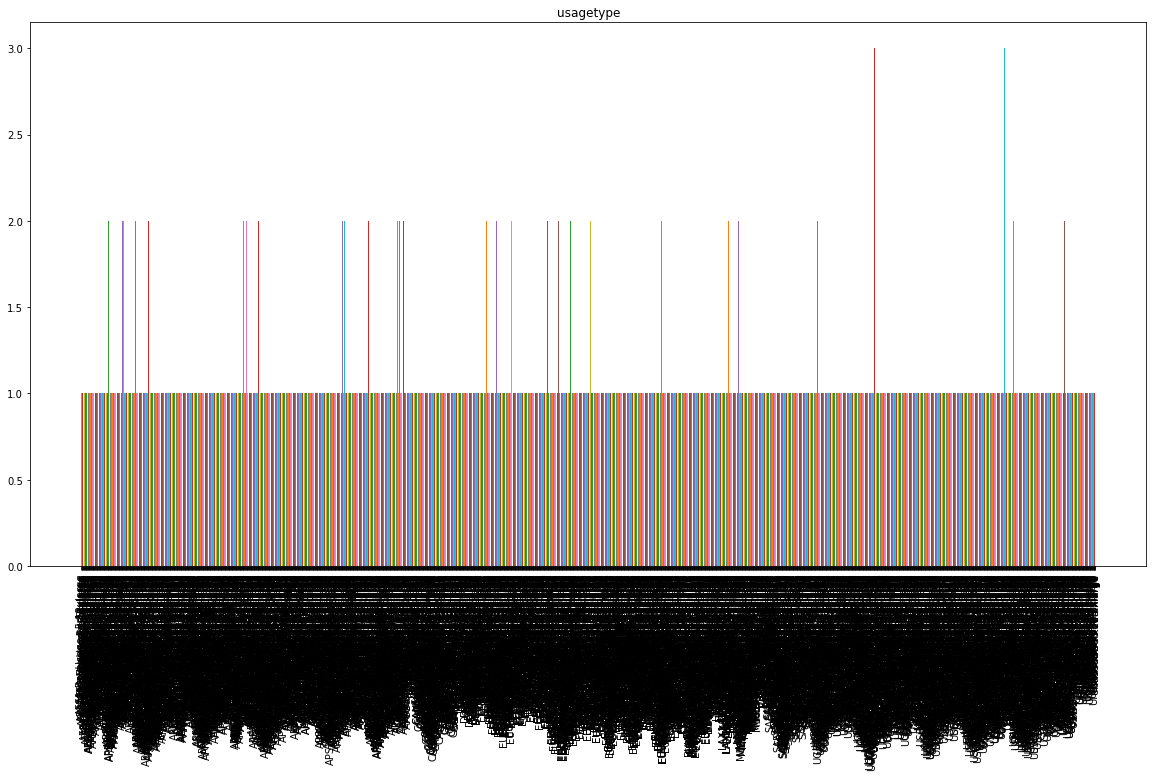

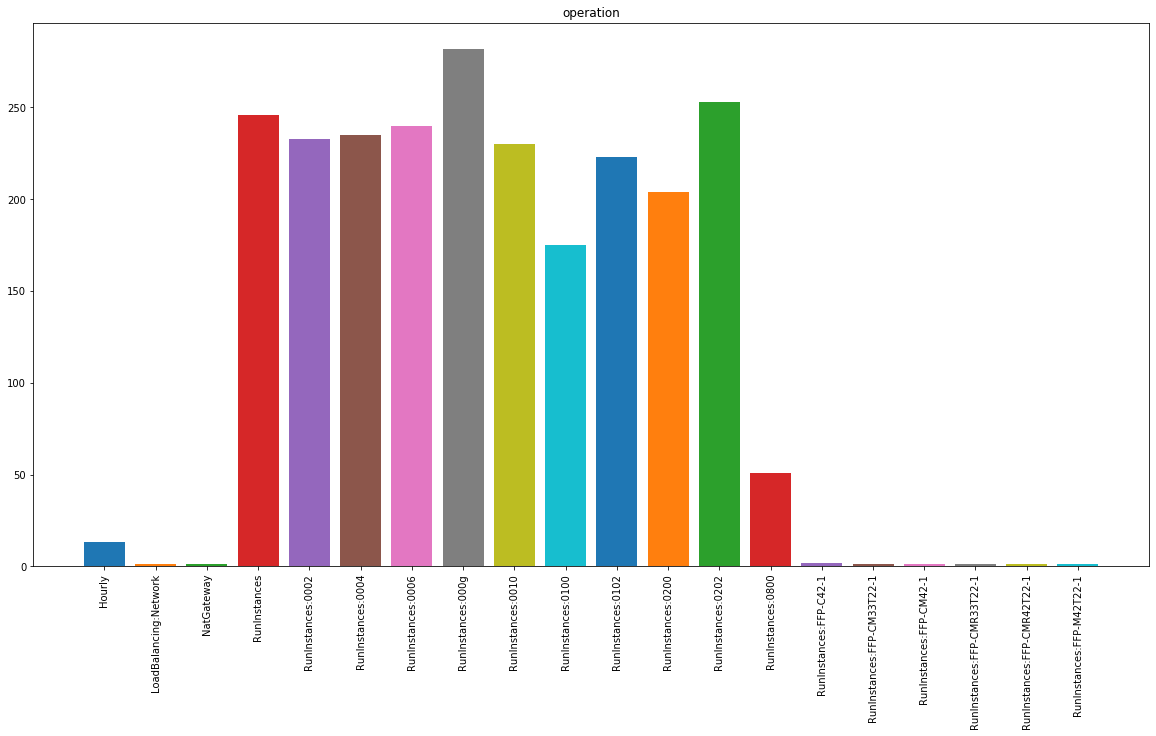

{'8', '24', '18'}


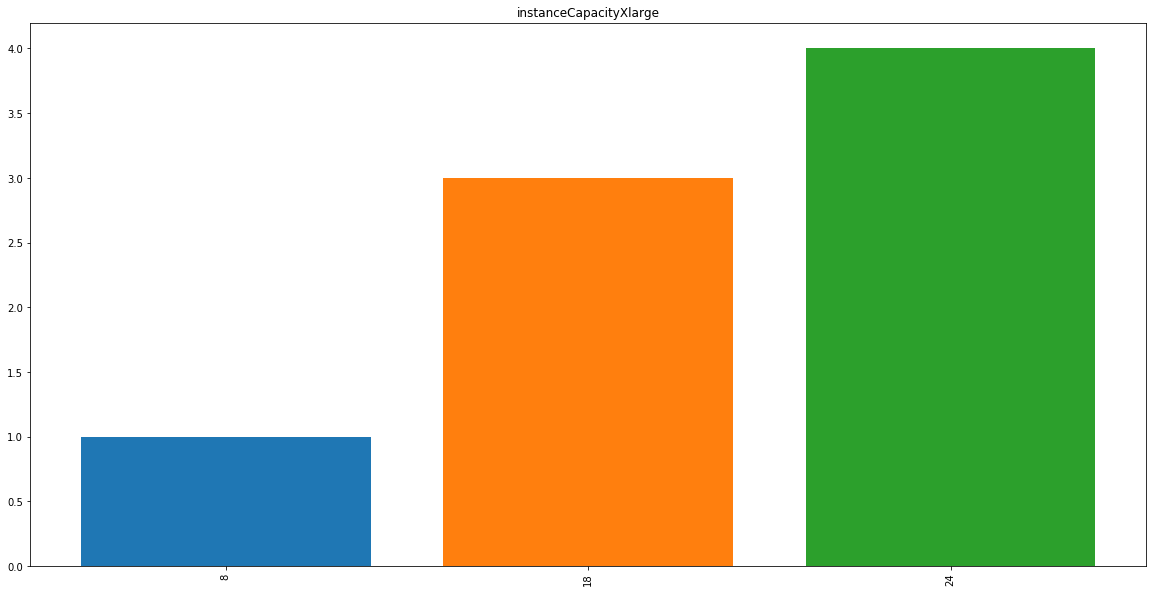

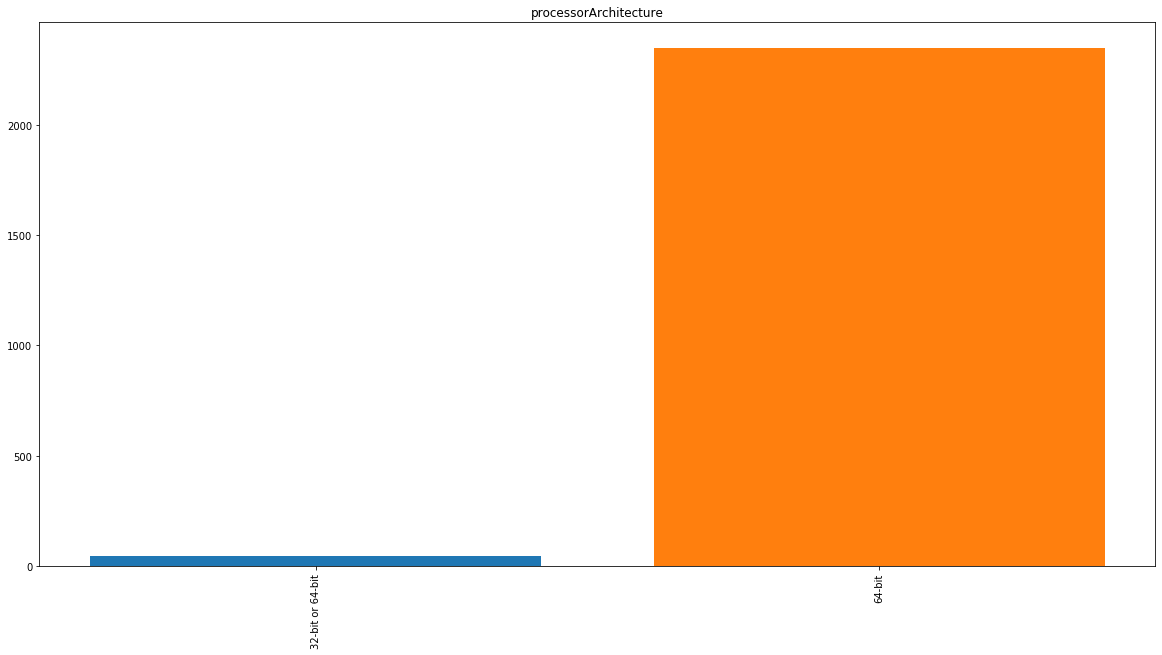

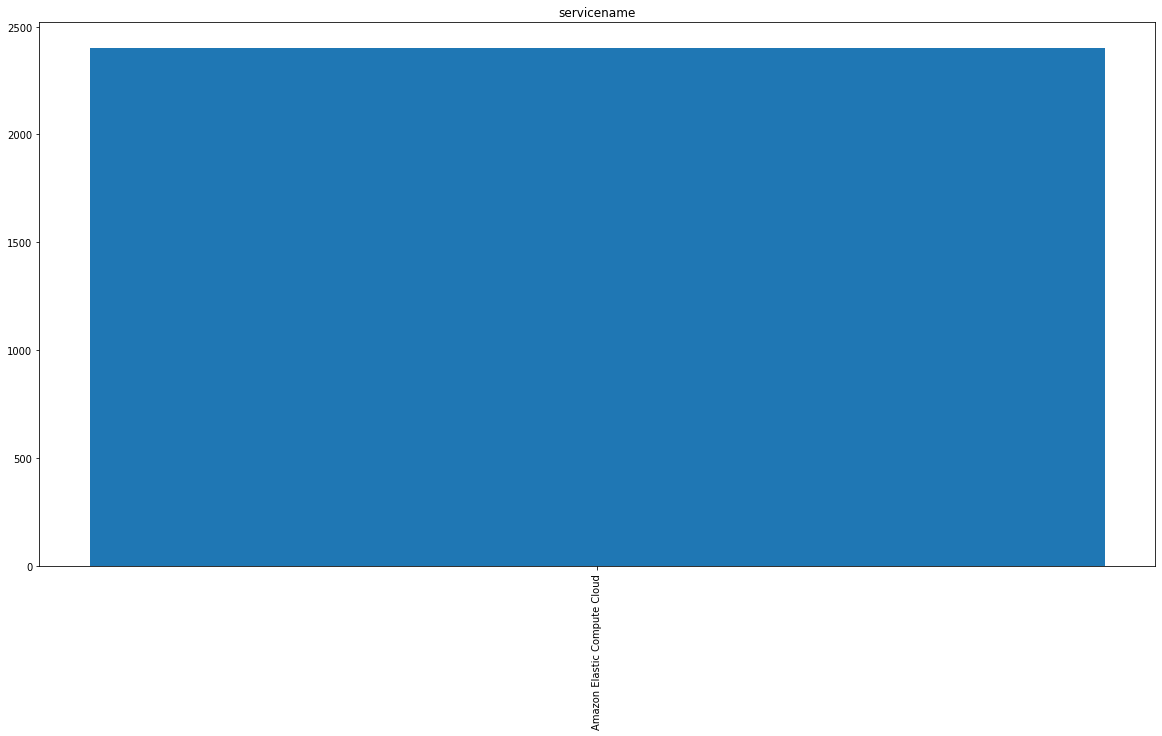

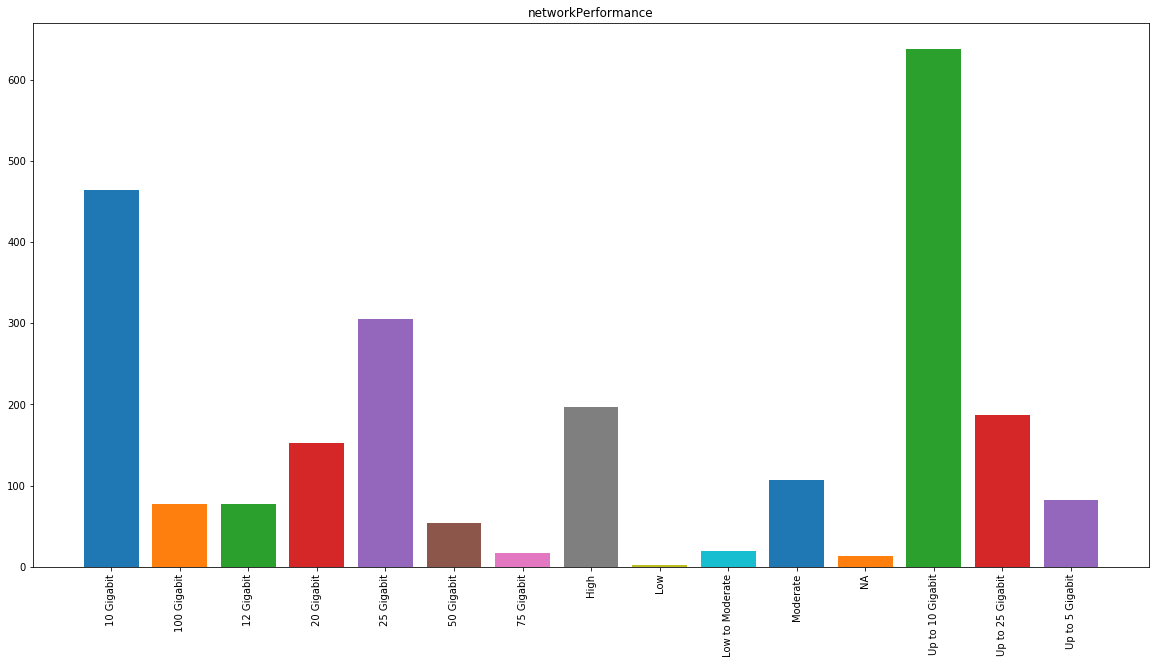

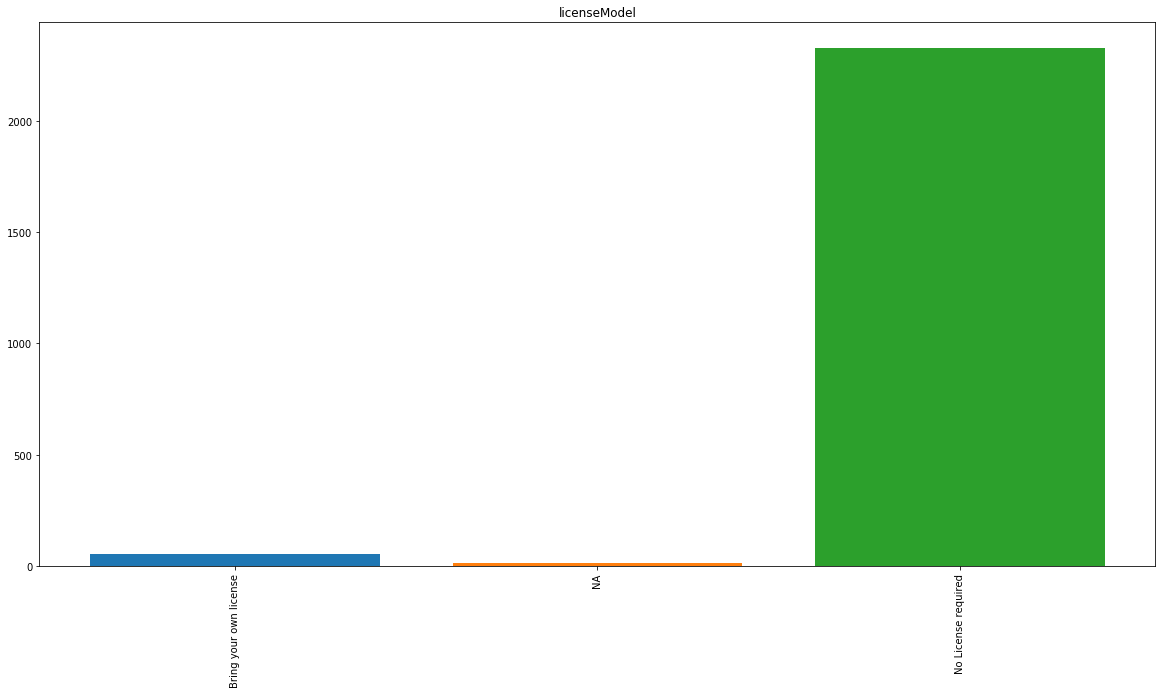

{'4', '8', '12'}


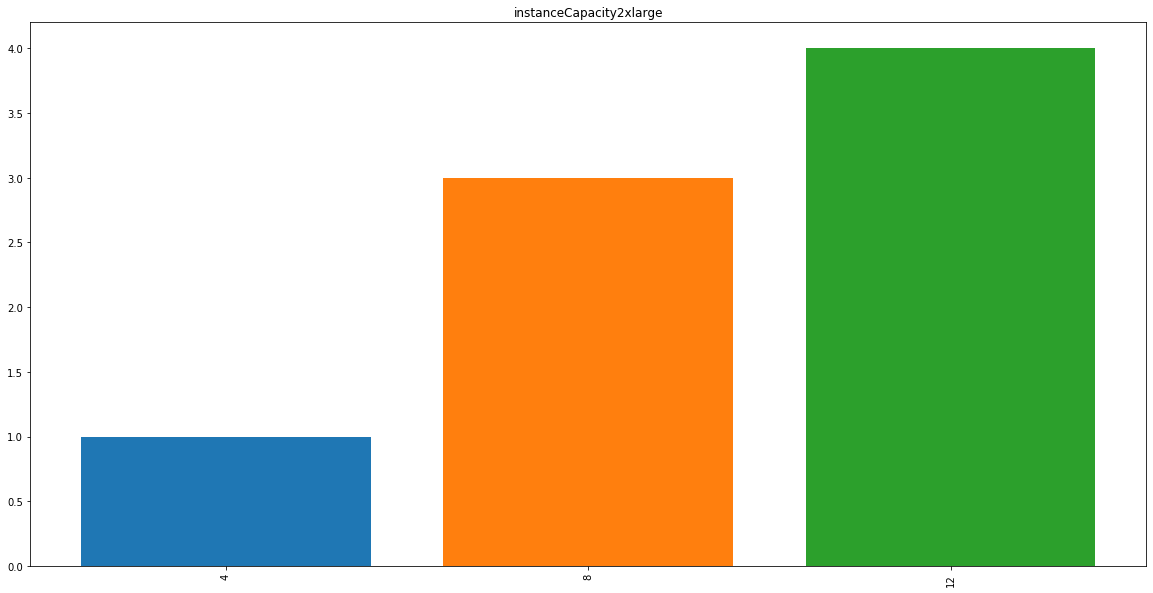

{'4', '2', '6'}


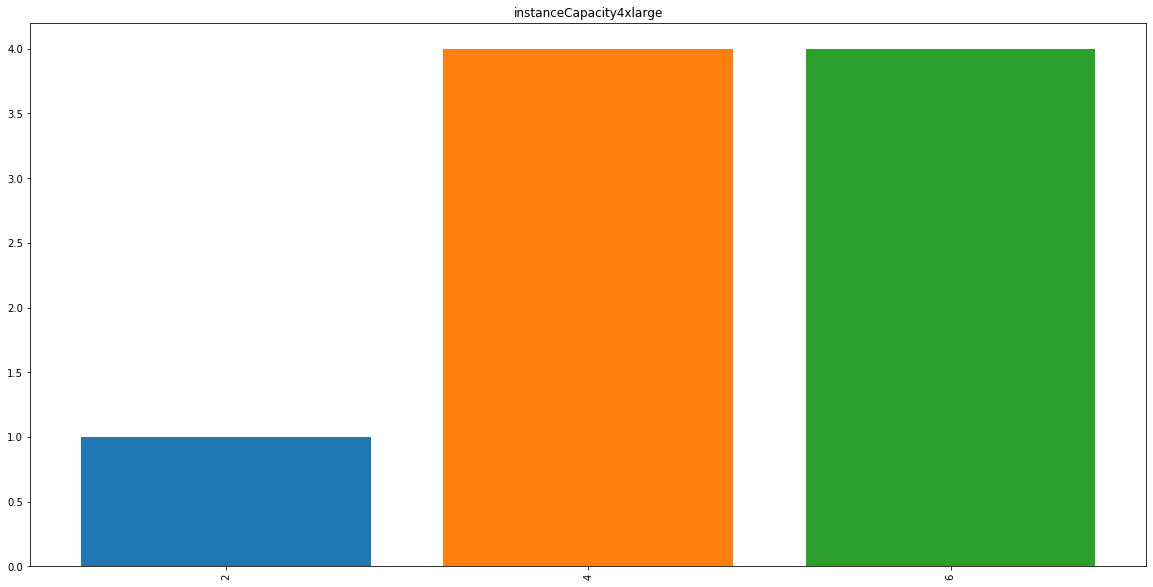

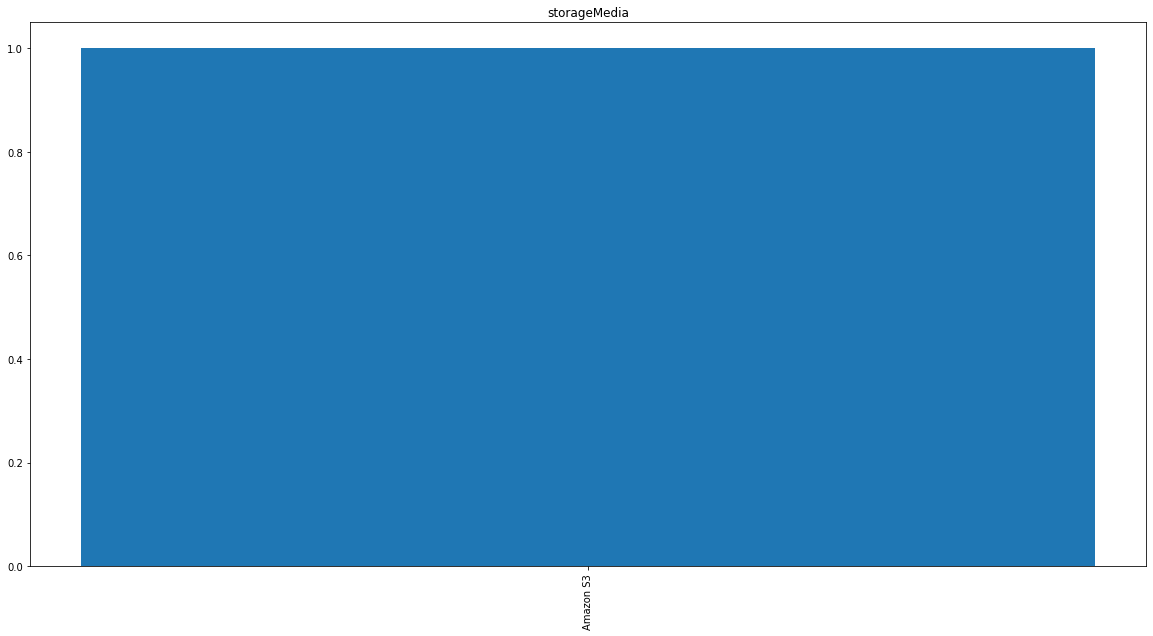

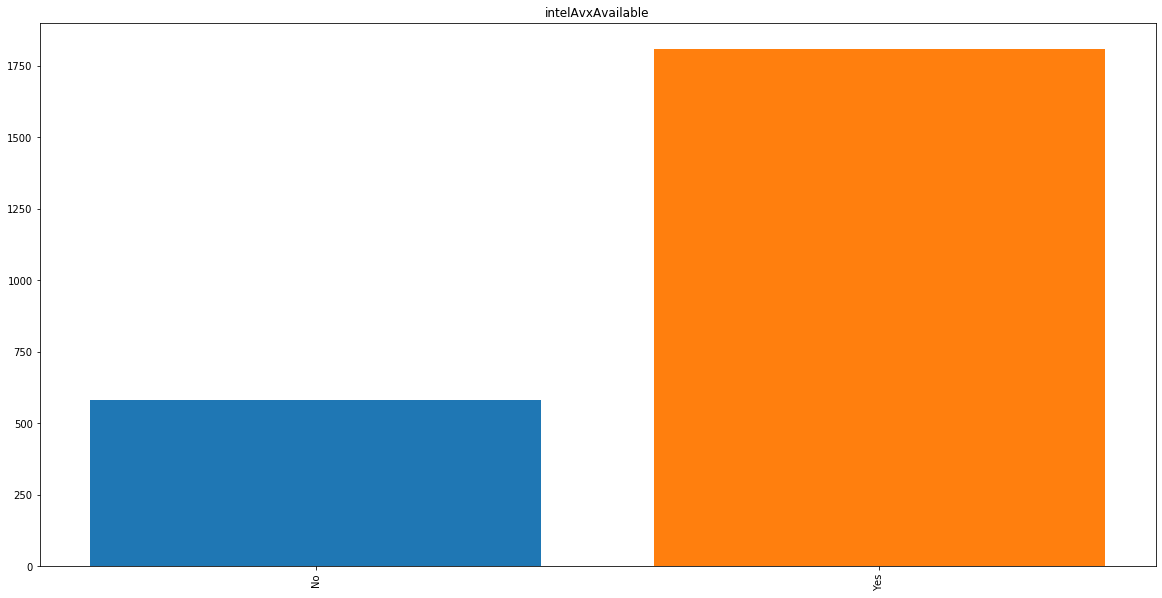

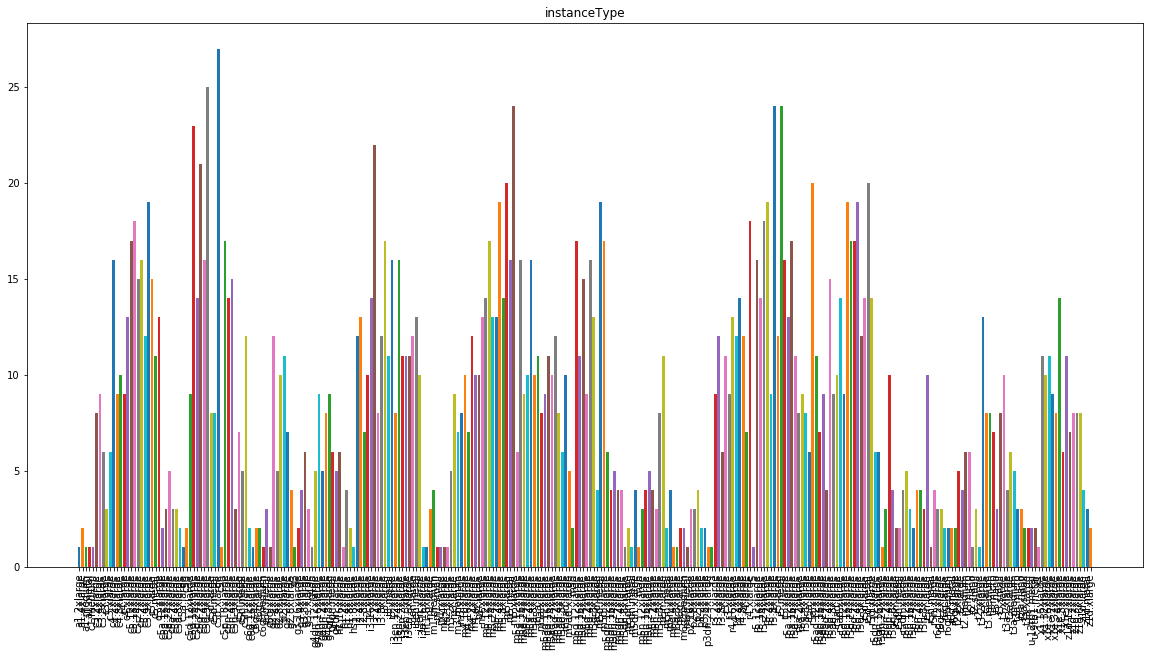

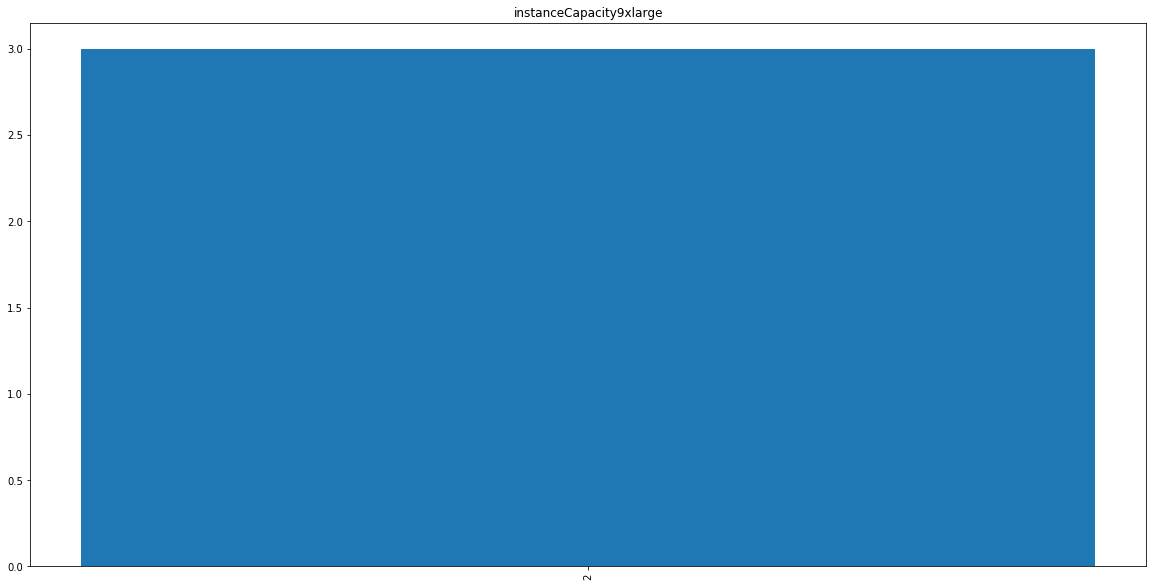

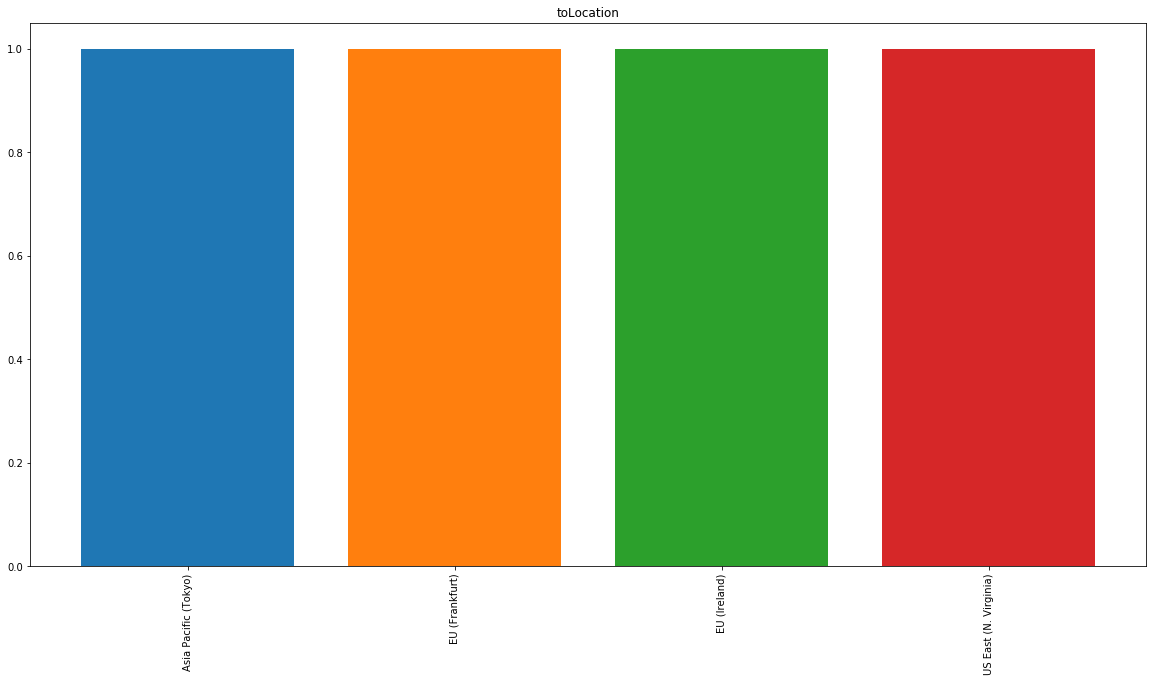

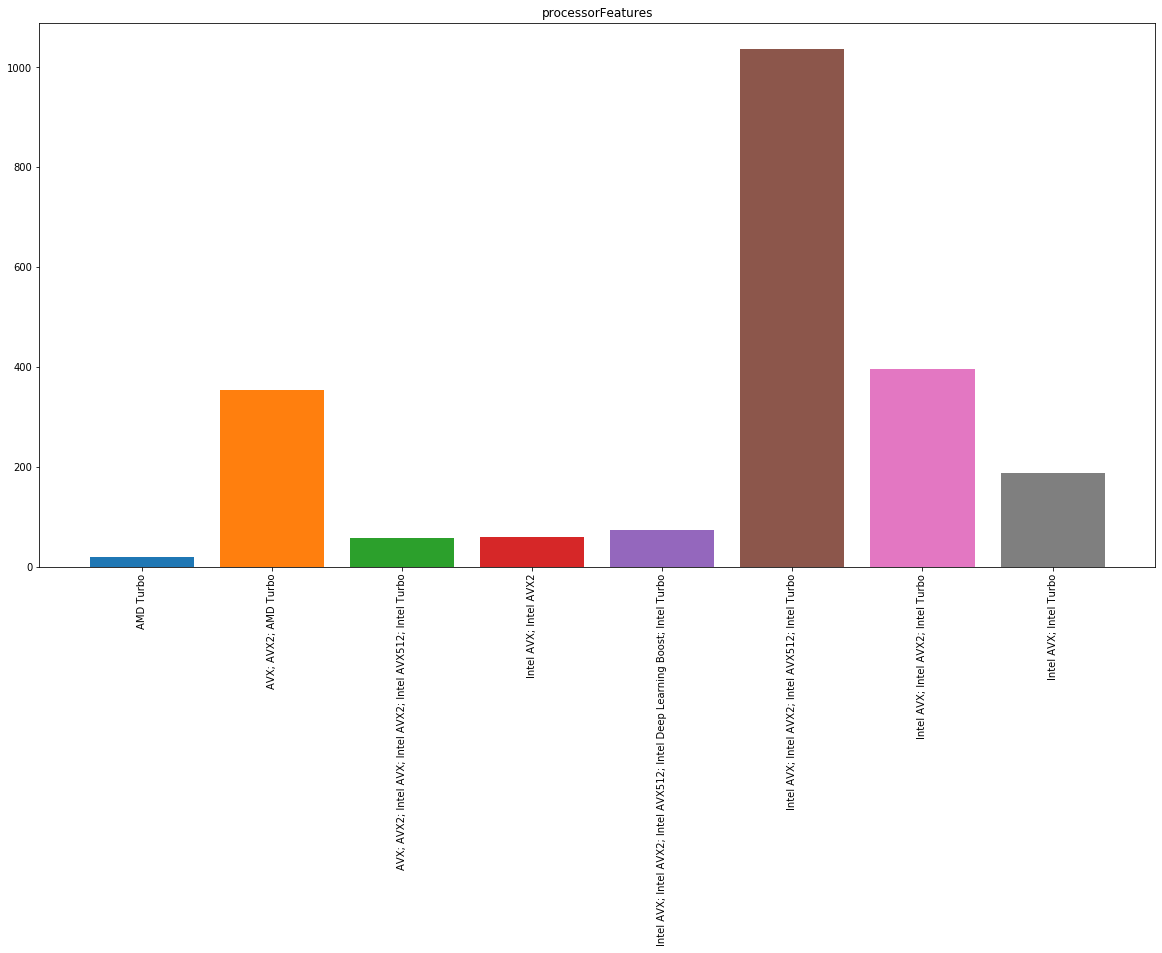

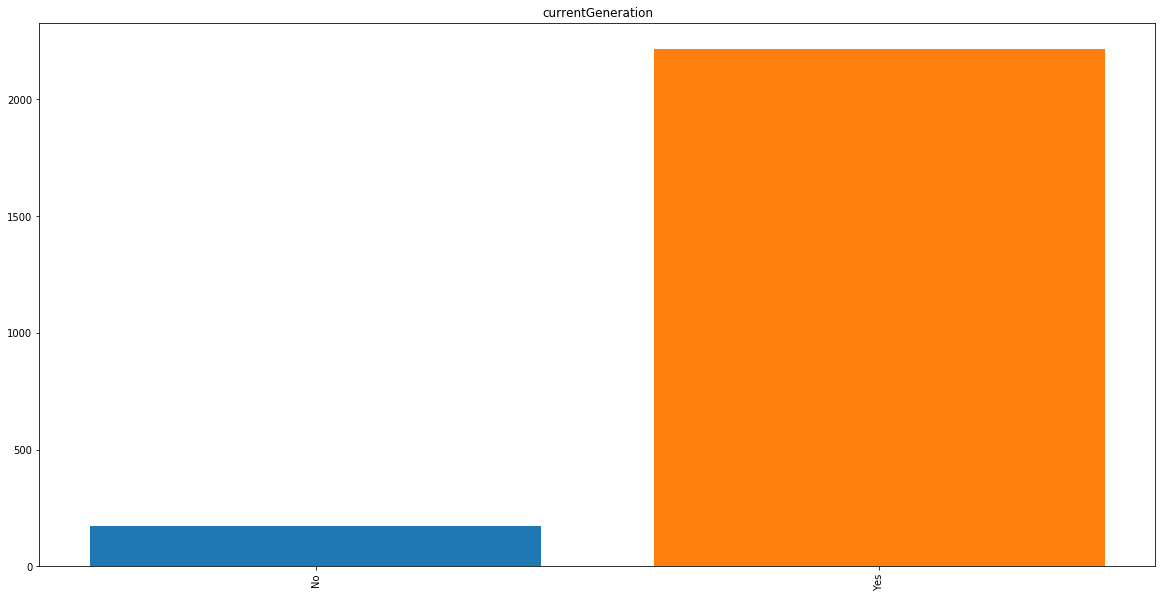

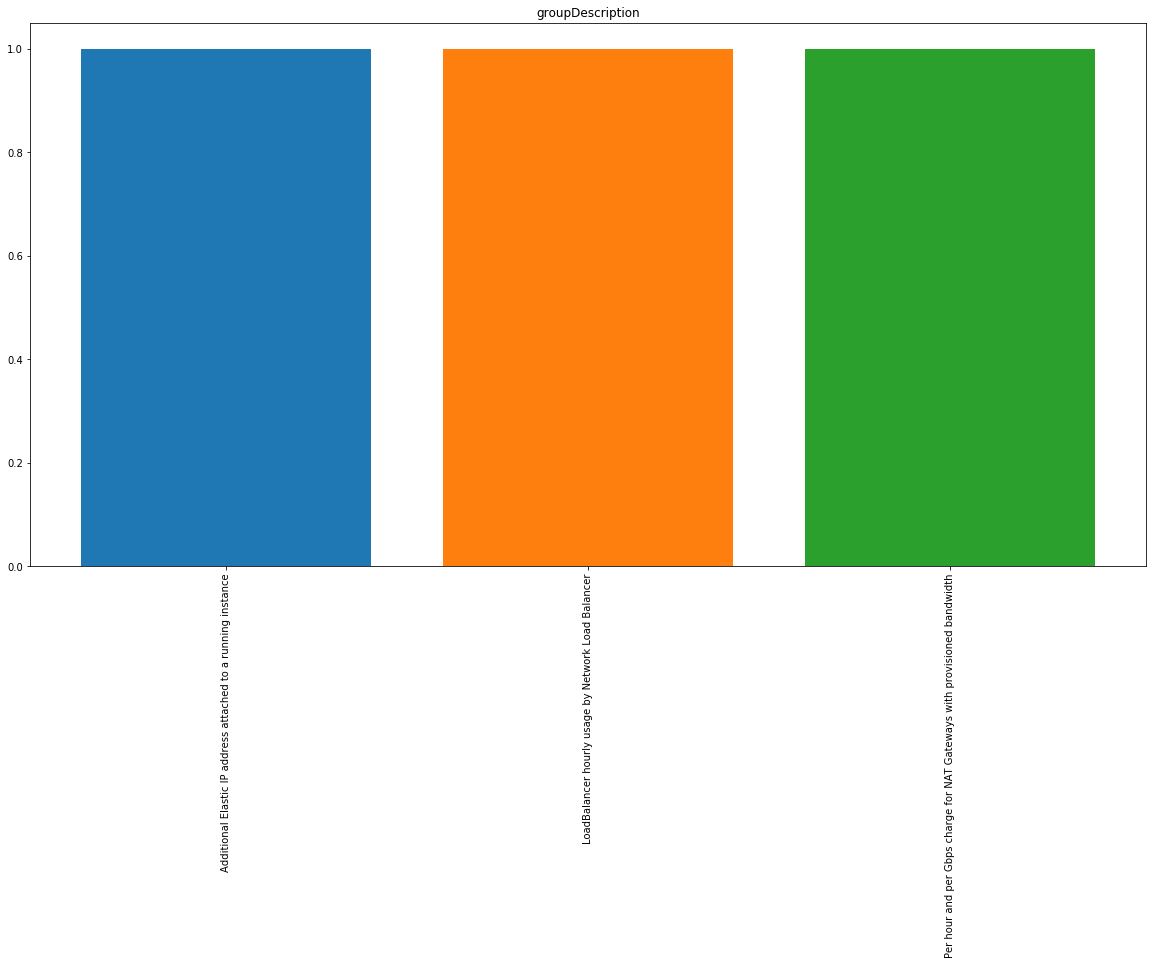

{'16', '48', '36'}


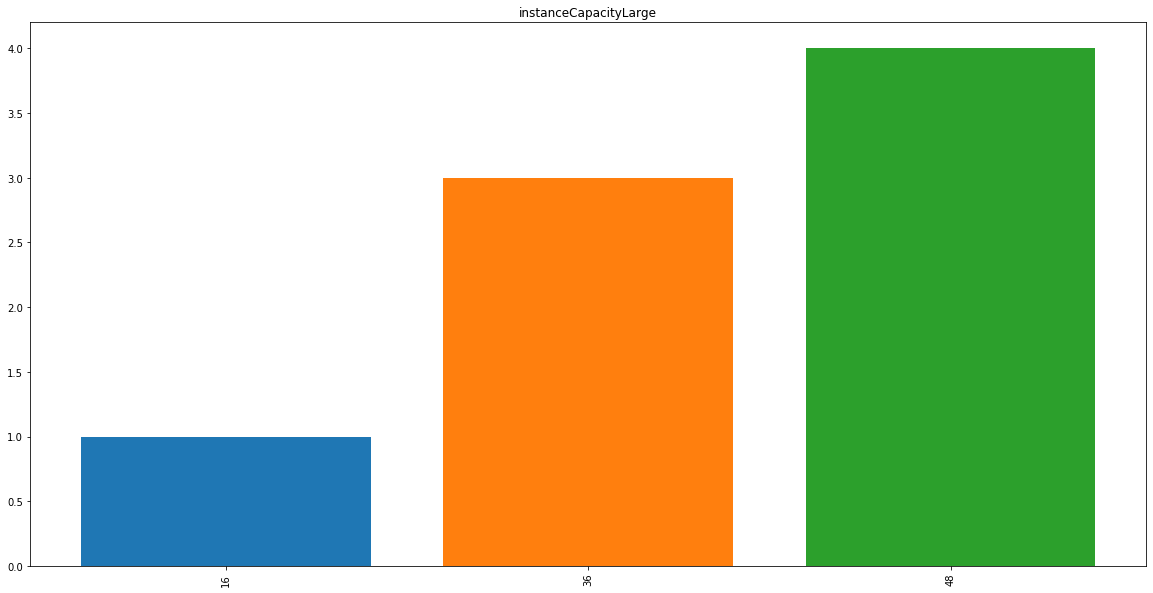

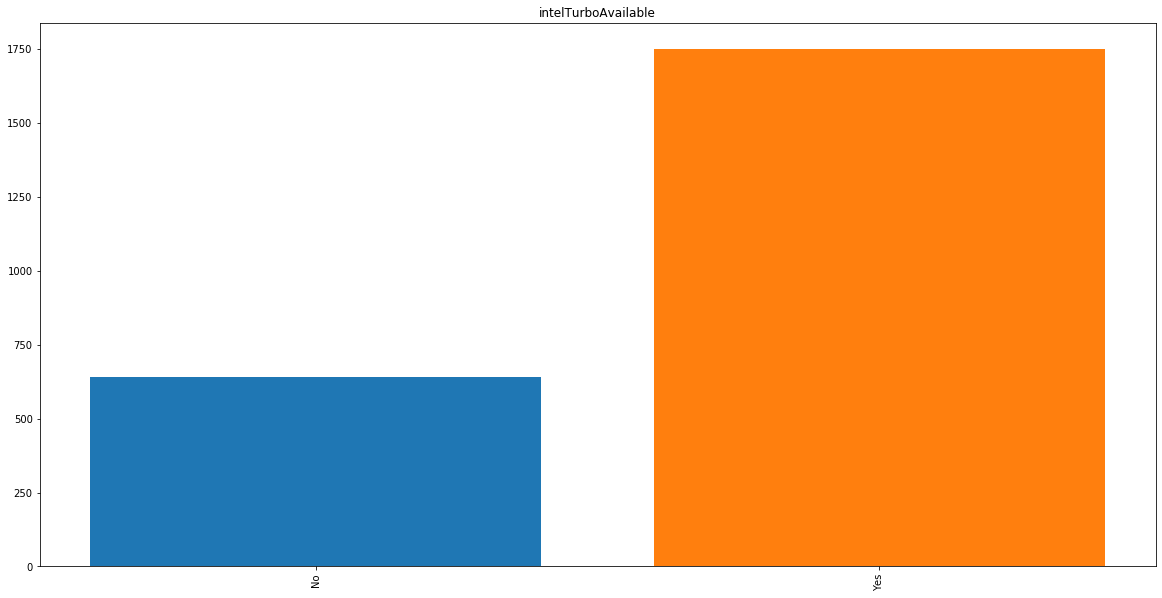

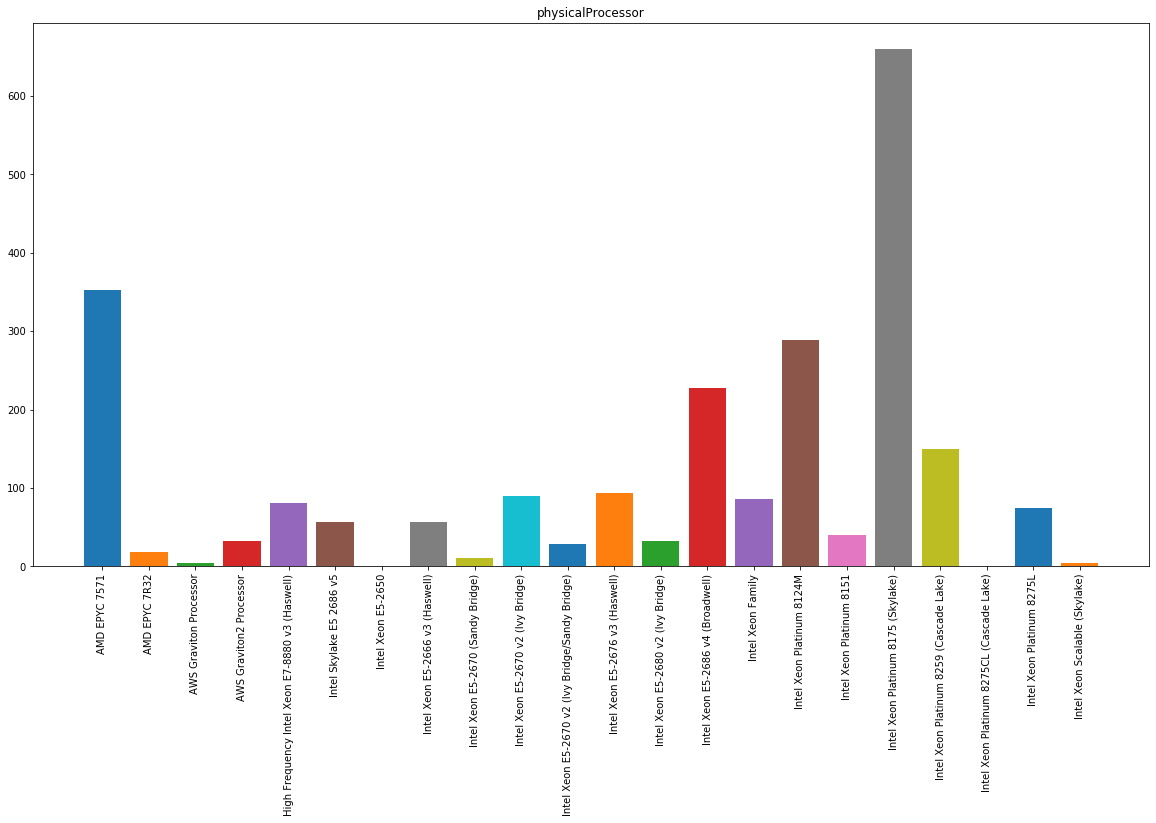

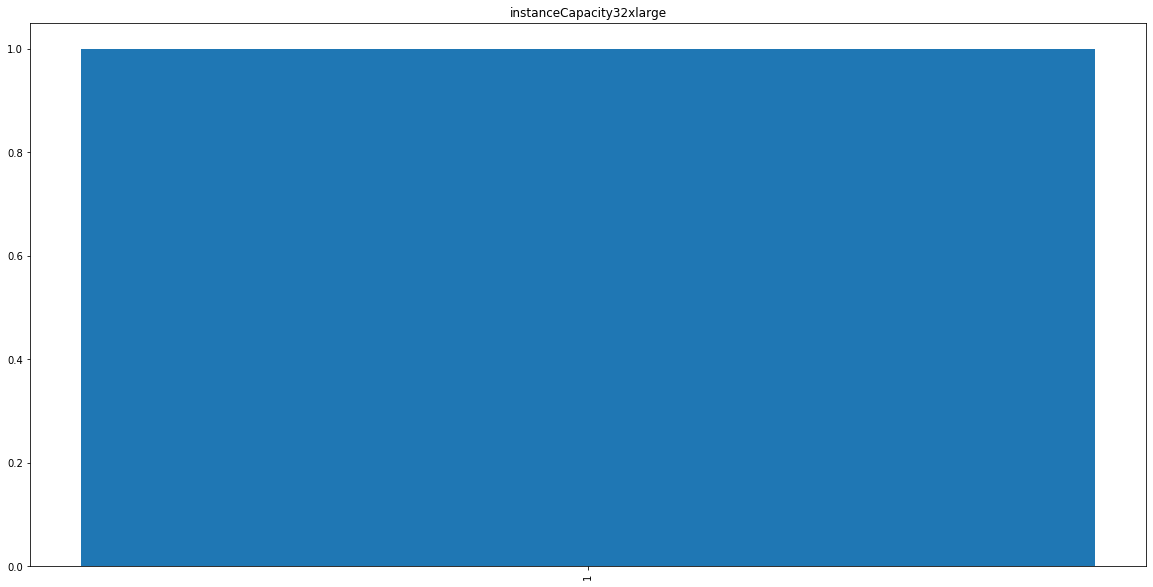

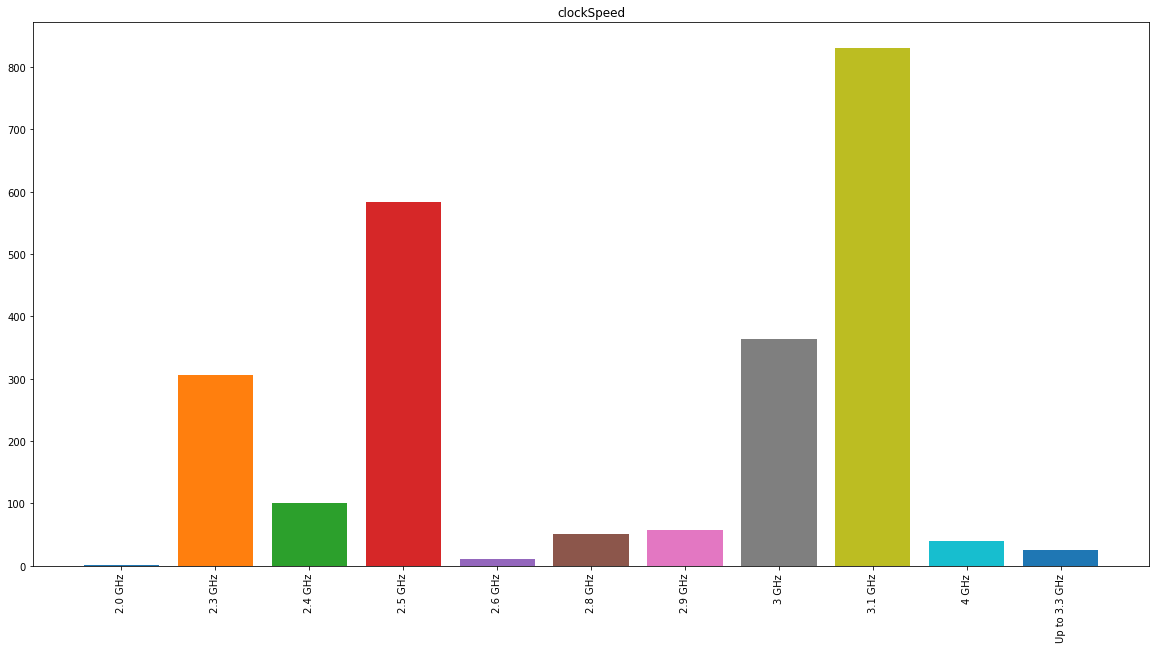

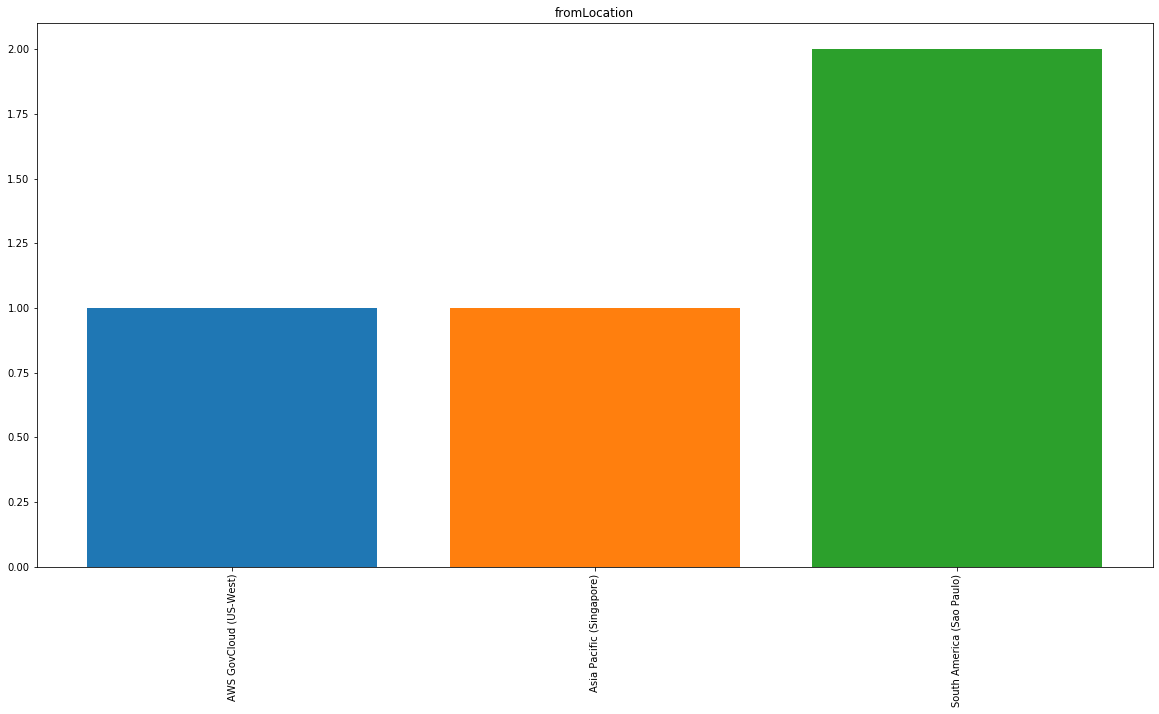

In [26]:
for i in unique_keys:
    bar_chart(i)

In [27]:
attribute_key = "location"
attribute_value = "Asia Pacific (Tokyo)"
common_attribute_count(attribute_key, attribute_value)

139

In [28]:
attribute_key = "instanceFamily"
attribute_value = "General purpose"
common_attribute_count(attribute_key, attribute_value)

726

The function `common_attribute_finder` allows the user to find out all values for each attribute . For example: if the user wants to see how many services arehave 32 GiB memory, then they can specify the key as 'memory' and the value as '32 GiB'.

This gives us a list of services that deliver similar attributes and for our use case, we can easily find out more services and details about the same using this feature.

After finding out all the products that offer the same feature as selected, we can store it in a file named after the attribute type and name. For example, if the user selects the key as 'memory' and the value as '32 GiB' the file name will be 'memory_32 GiB.txt'


In [29]:
def common_attribute_finder(attribute_key, attribute_value):
    filename = attribute_key + "_" + attribute_value + ".txt"
    with open(filename, "w+") as f:
        for key, value in dfp.items():
            attributes = value["attributes"]
            new_dict = defaultdict(list)
            for k, v in attributes.items():
                if k == attribute_key:
                    if v == attribute_value:
                        new_dict[k].append(attributes)
                        print((new_dict), file=f)
        f.close()

In [30]:
def find_second_common_attribute(attribute_key, attribute_value, attribute_two):
    counter = 0
    filename = attribute_key + "_" + attribute_value + ".txt"
    with open(filename, "r") as file:
        d = file.read()
    d = d.split("\n")
    for i in d:
        if attribute_two in i:
            #             print(i)
            counter = counter + 1
    print("Total values that have the second attribute common : ", counter)
    return counter

In [31]:
attribute_key = "memory"
attribute_value = "32 GiB"
common_attribute_finder(attribute_key, attribute_value)
common_attribute_count(attribute_key, attribute_value)
find_second_common_attribute(attribute_key, attribute_value, "EBS")

Total values that have the second attribute common :  124


124

### Conclusion :

* In this notebook, we have imported the data from aws-pricing and performed initial analysis on the same
    * Import the dataset locally.
    * Data Preprocessing
    * Data Analysis

* After this analysis, we observe that "attributes" hold the maximum information
* We are also planning to implement detailed analysis on the attribute "instanceType". Please follow in-depth analysis notebook for the same.